# Analysis of Diaz2019 mouse ESC data

Before proceeding, download the inDrops counts tables here:<br>
https://kleintools.hms.harvard.edu/paper_websites/diaz_2019/Diaz2019_inDropsCountsTables.zip

Check out our web portal for fully analyzed interactive versions of the single-cell data: <br>
https://tinyurl.com/DiazPourquie2019

### Import Packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import scipy.sparse
import os
import sys
import bbknn
import pickle

sys.path.append('../')
import helper_functions_dew as dew

In [2]:
# ScanPy settings
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

# Matplotlib settings
plt.rcParams['pdf.fonttype']=42  # Necessary to export text (rather than curves) in pdf files

scanpy==1.4.3 anndata==0.6.19 umap==0.3.8 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


### Import Libraries

_________________ DEW209
Loading from npz file
(1829, 40523) 

_________________ DEW210
Loading from npz file
(2133, 40523) 

_________________ DEW213
Loading from npz file
(2269, 40523) 

_________________ DEW214
Loading from npz file
(2190, 40523) 

_________________ DEW216
Loading from npz file
(2580, 40523) 

_________________ DEW217
Loading from npz file
(2473, 40523) 

_________________ DEW219
Loading from npz file
(5084, 40523) 

_________________ DEW220
Loading from npz file
(5010, 40523) 

_________________ DEW221
Loading from npz file
(4773, 40523) 

_________________ DEW222
Loading from npz file
(4678, 40523) 

_________________ DEW224
Loading from npz file
(3236, 40523) 

_________________ DEW225
Loading from npz file
(3718, 40523) 

_________________ DEW227
Loading from npz file
(2181, 40523) 

_________________ DEW228
Loading from npz file
(2825, 40523) 

_________________ DEW230
Loading from npz file
(3952, 40523) 

_________________ DEW231
Loading from npz file
(4378, 4

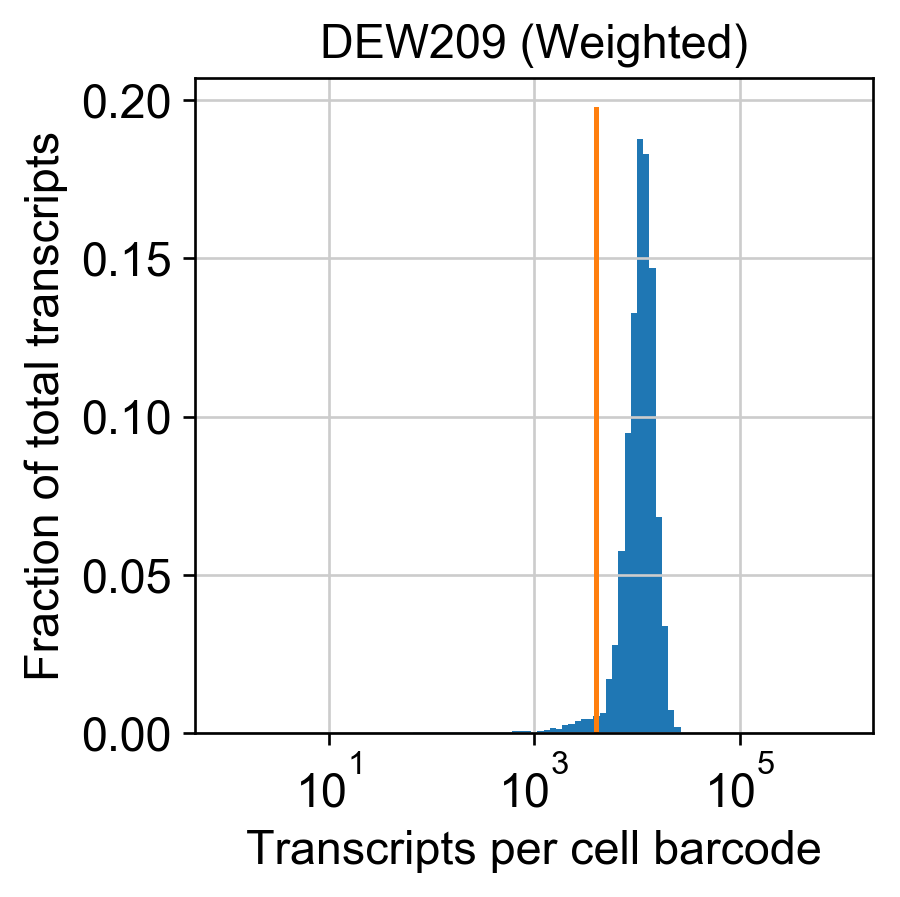

Filtering barcodes for DEW209  ( 1096 / 1829 )
filtered out 733 cells that have less than 4000 counts


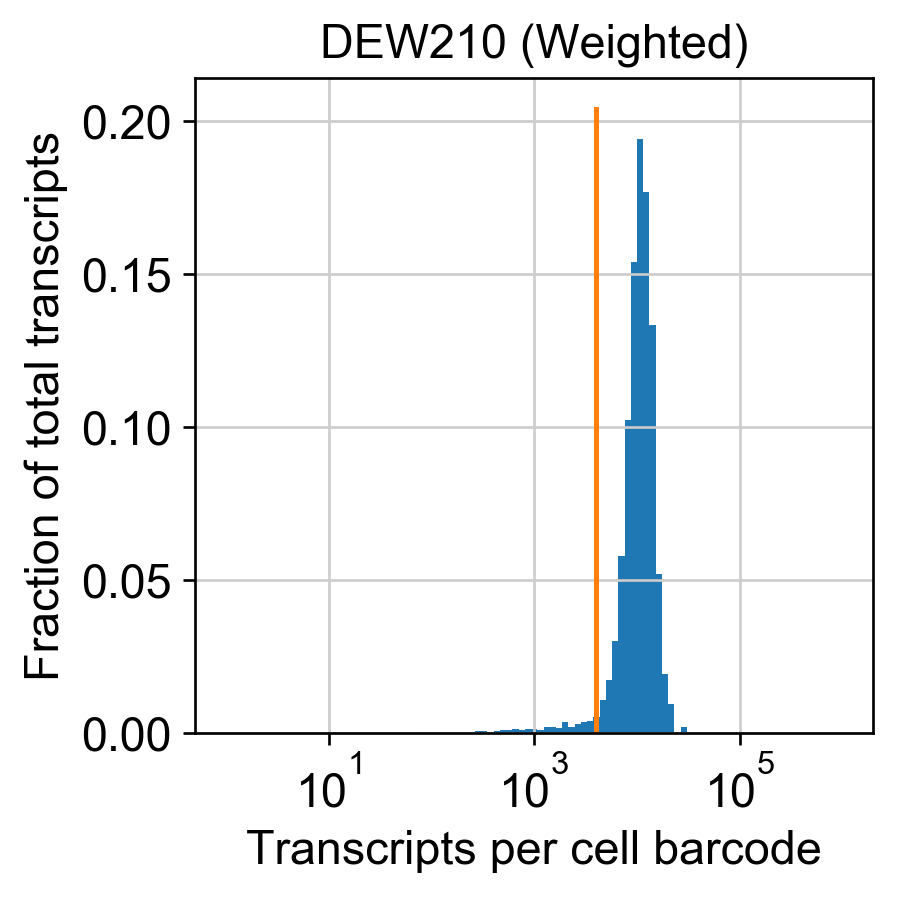

Filtering barcodes for DEW210  ( 1248 / 2133 )
filtered out 885 cells that have less than 4000 counts


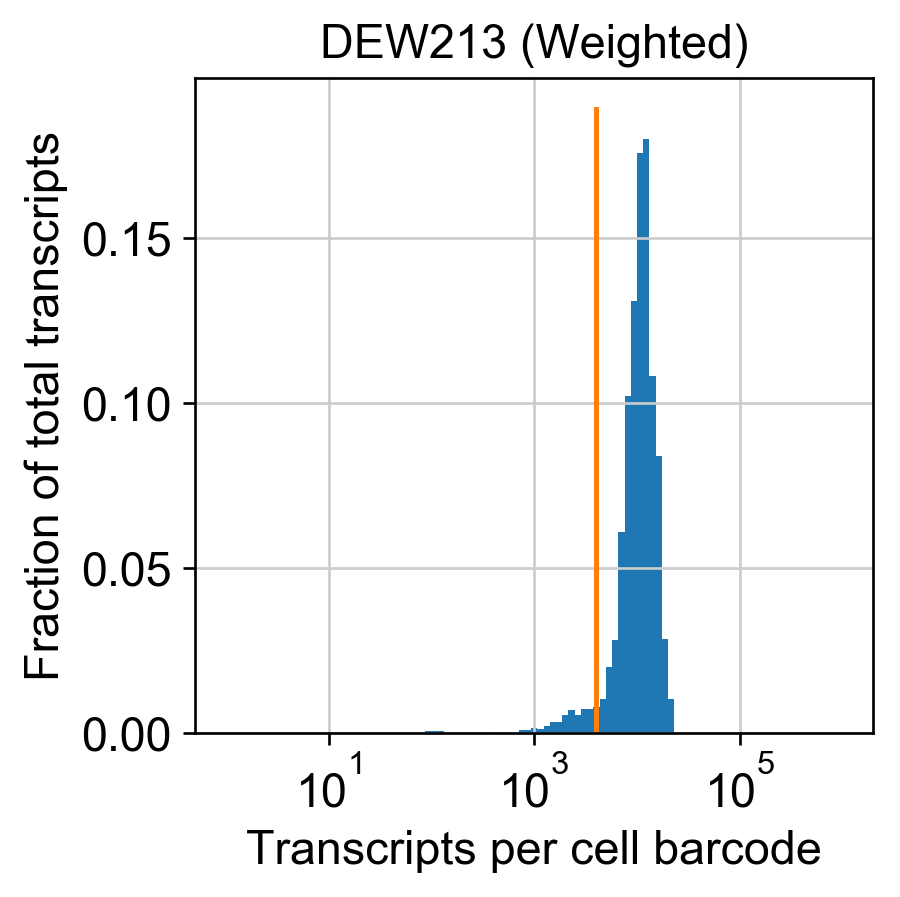

Filtering barcodes for DEW213  ( 1311 / 2269 )
filtered out 958 cells that have less than 4000 counts


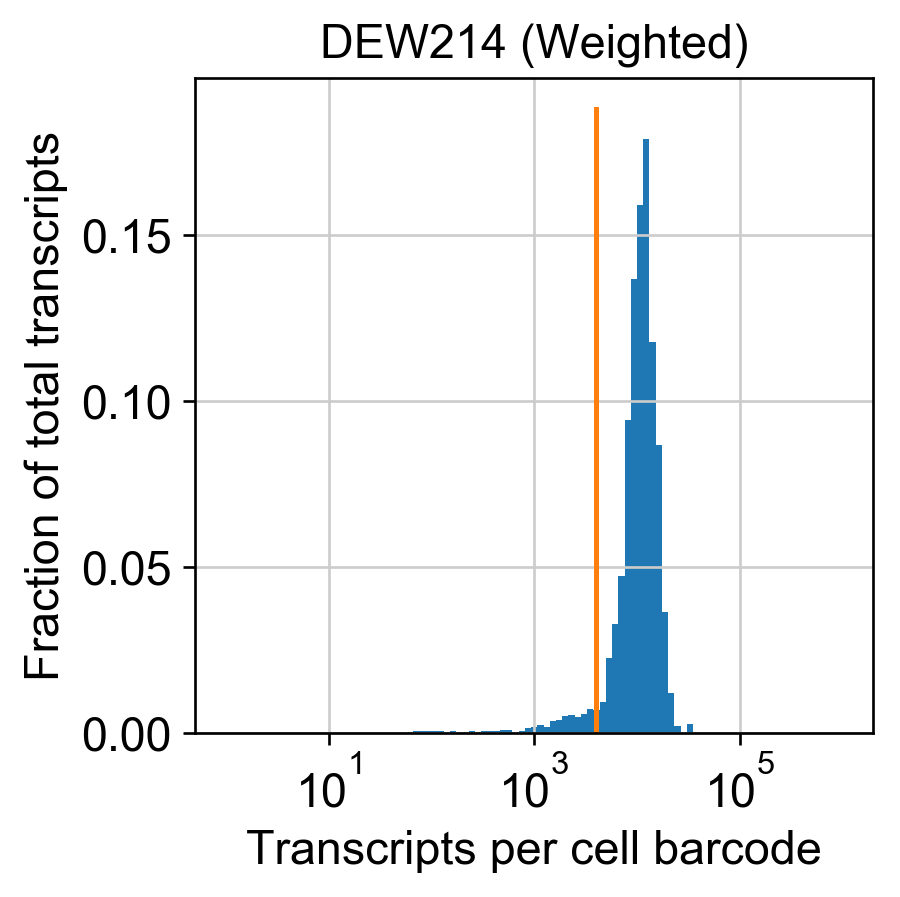

Filtering barcodes for DEW214  ( 1108 / 2190 )
filtered out 1082 cells that have less than 4000 counts


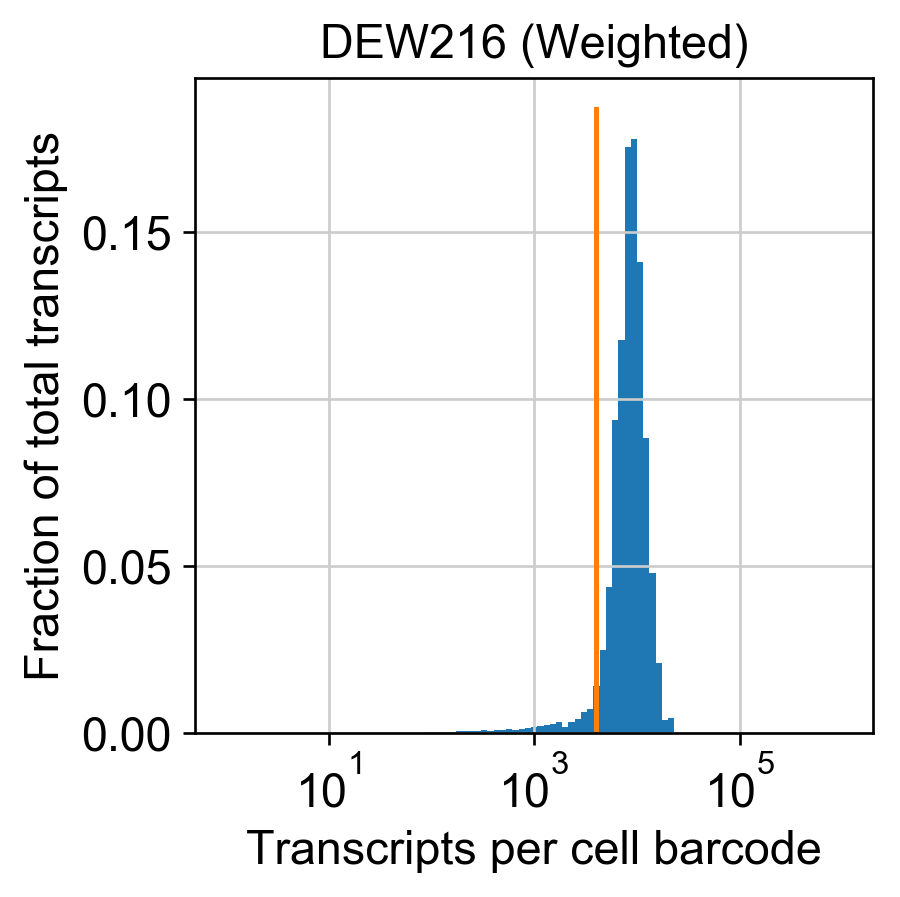

Filtering barcodes for DEW216  ( 1633 / 2580 )
filtered out 947 cells that have less than 4000 counts


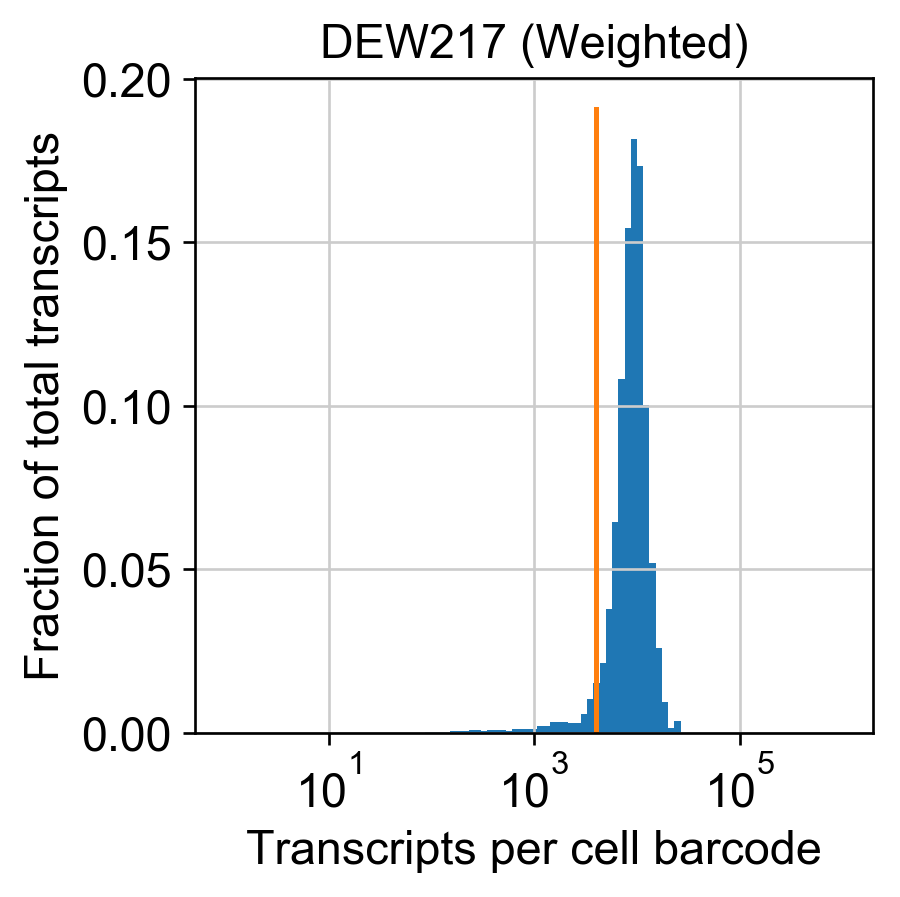

Filtering barcodes for DEW217  ( 1473 / 2473 )
filtered out 1000 cells that have less than 4000 counts


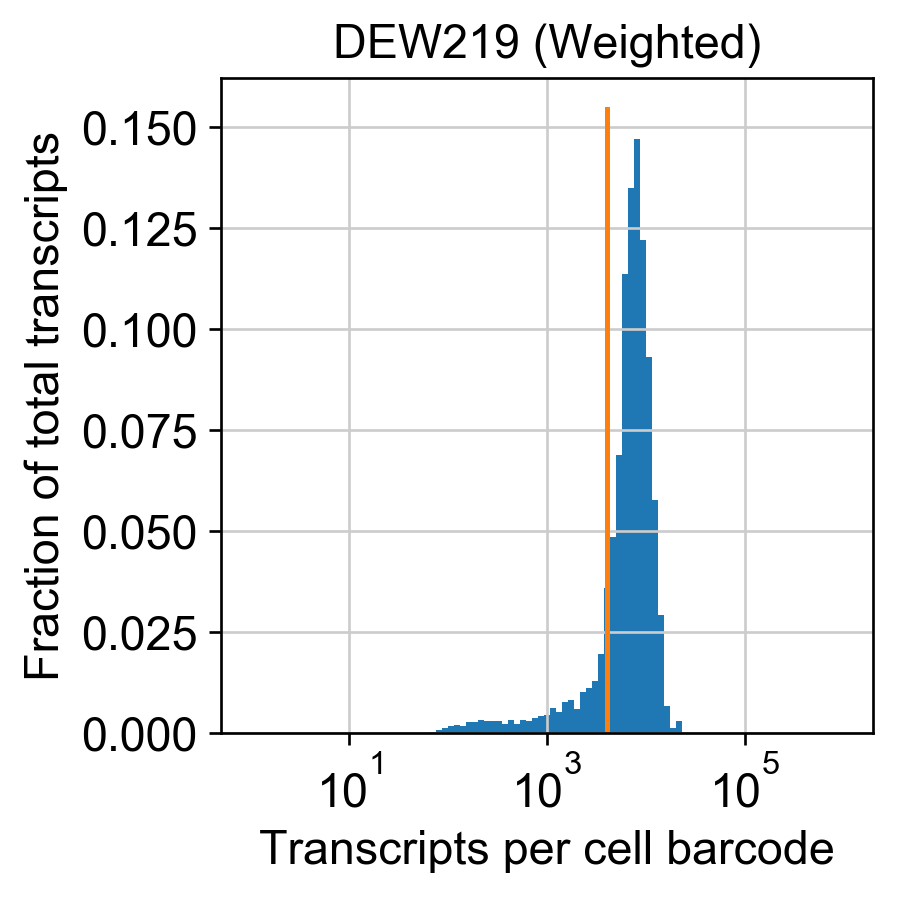

Filtering barcodes for DEW219  ( 1637 / 5084 )
filtered out 3447 cells that have less than 4000 counts


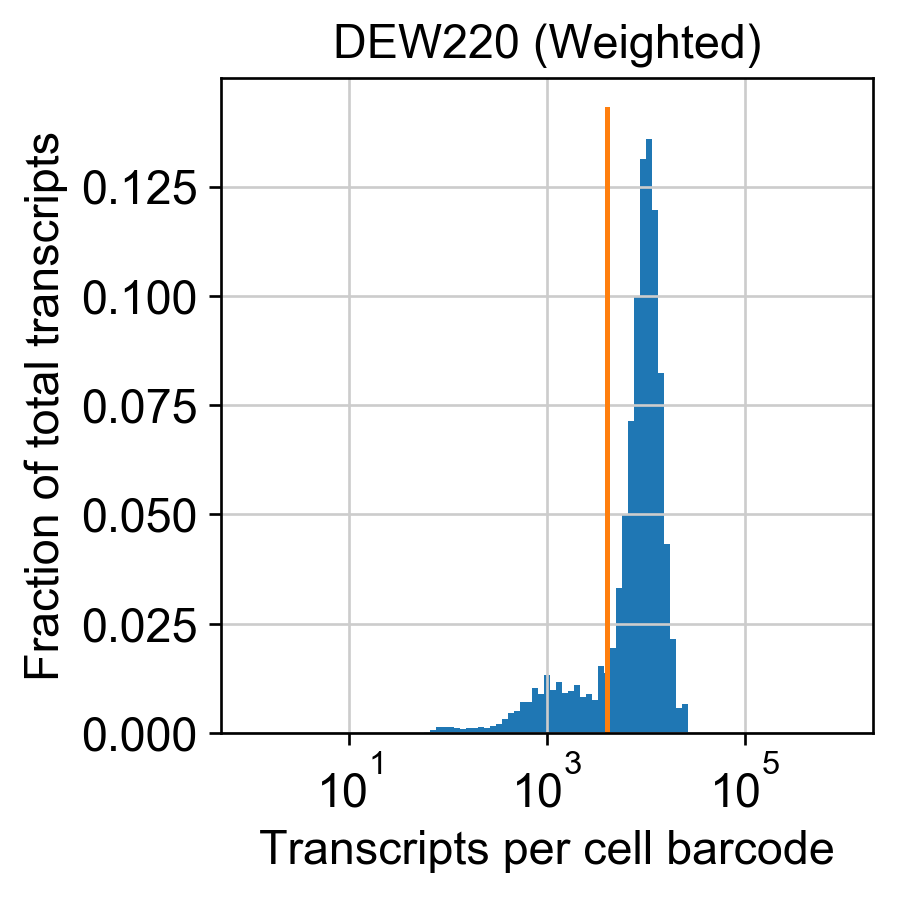

Filtering barcodes for DEW220  ( 1304 / 5010 )
filtered out 3706 cells that have less than 4000 counts


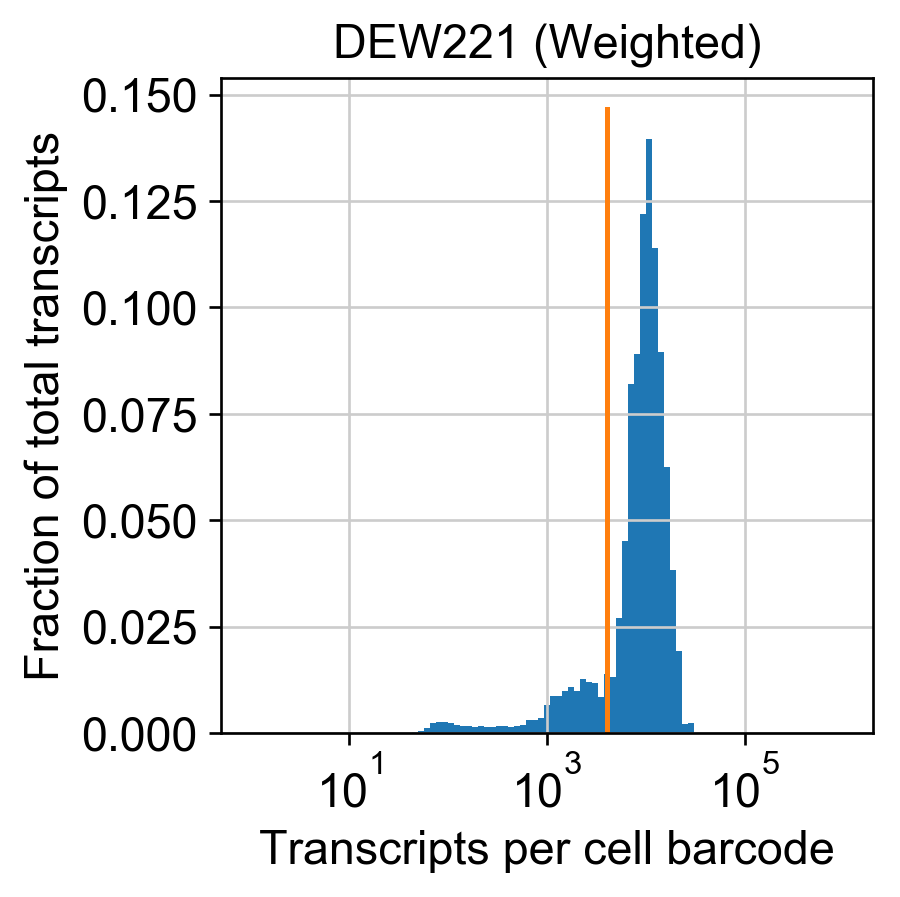

Filtering barcodes for DEW221  ( 1071 / 4773 )
filtered out 3702 cells that have less than 4000 counts


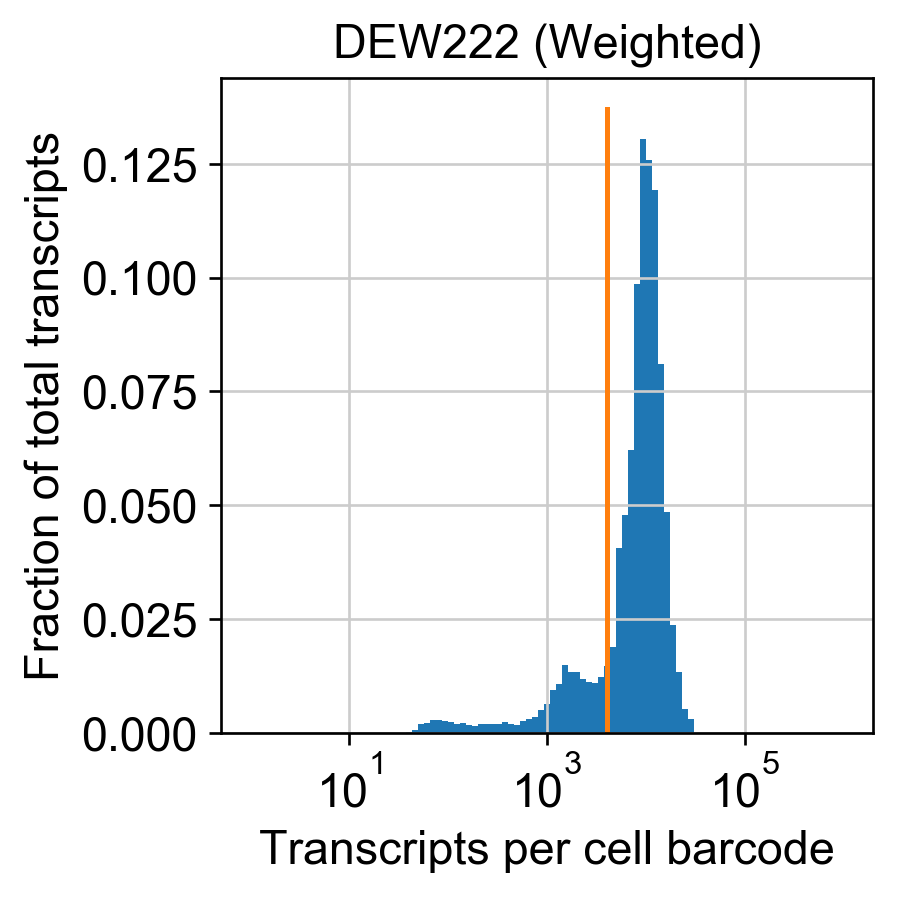

Filtering barcodes for DEW222  ( 833 / 4678 )
filtered out 3845 cells that have less than 4000 counts


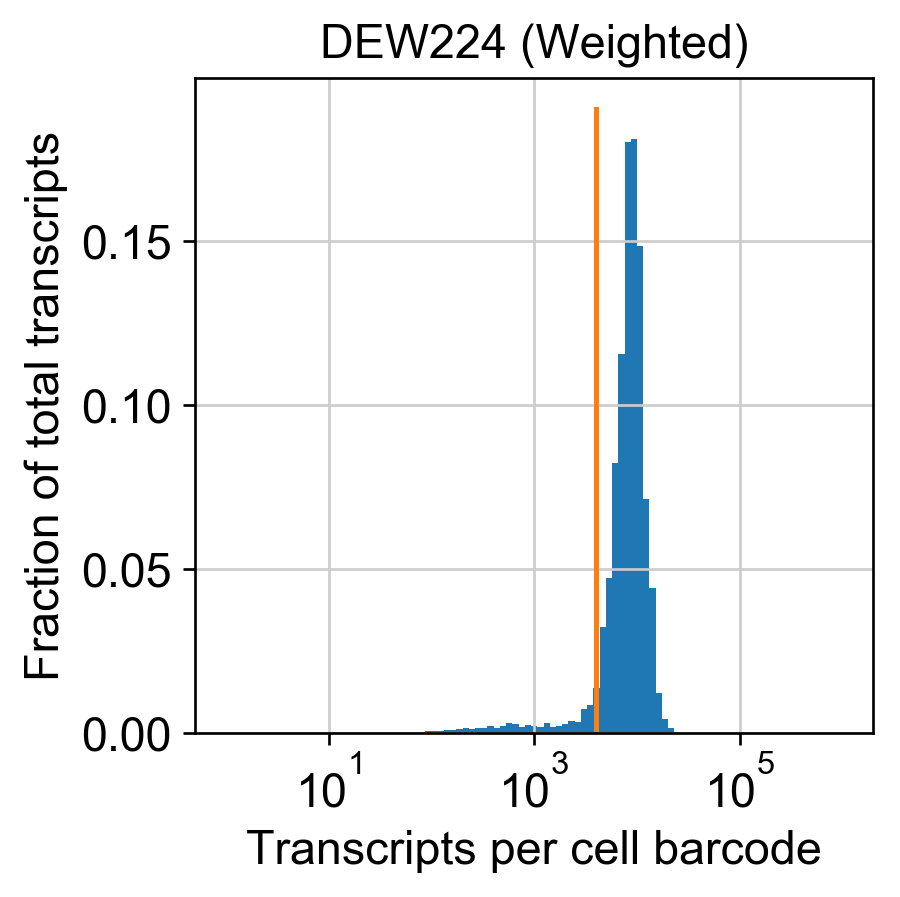

Filtering barcodes for DEW224  ( 1507 / 3236 )
filtered out 1729 cells that have less than 4000 counts


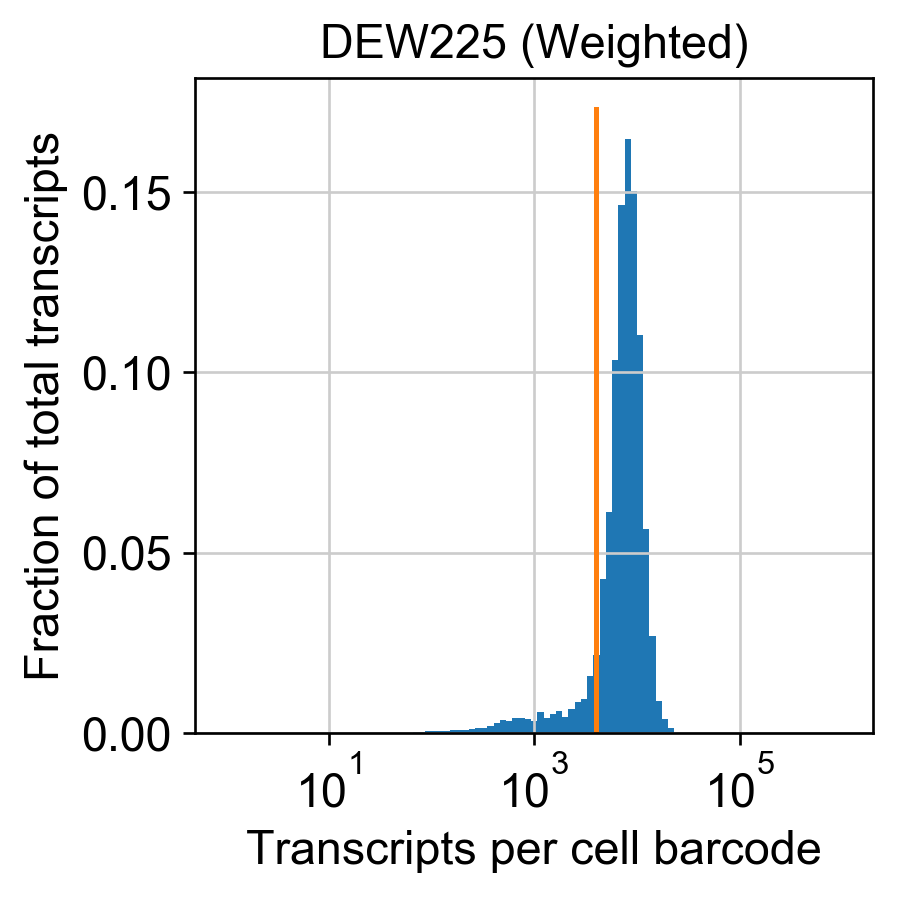

Filtering barcodes for DEW225  ( 1684 / 3718 )
filtered out 2034 cells that have less than 4000 counts


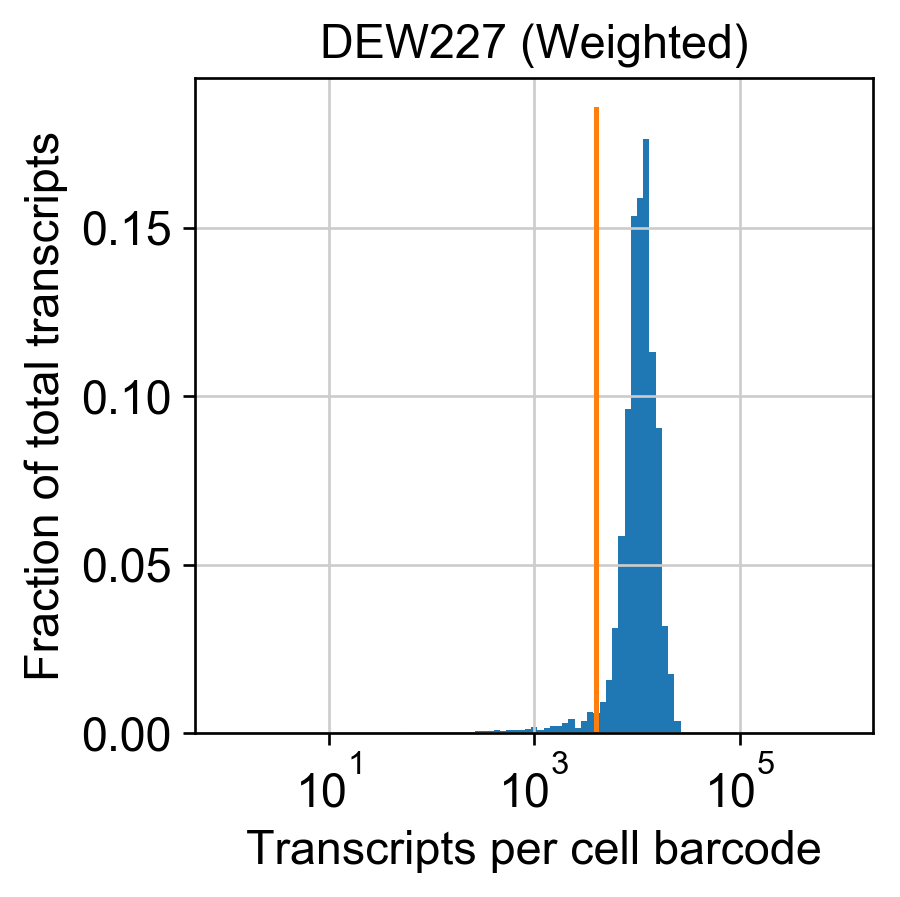

Filtering barcodes for DEW227  ( 1245 / 2181 )
filtered out 936 cells that have less than 4000 counts


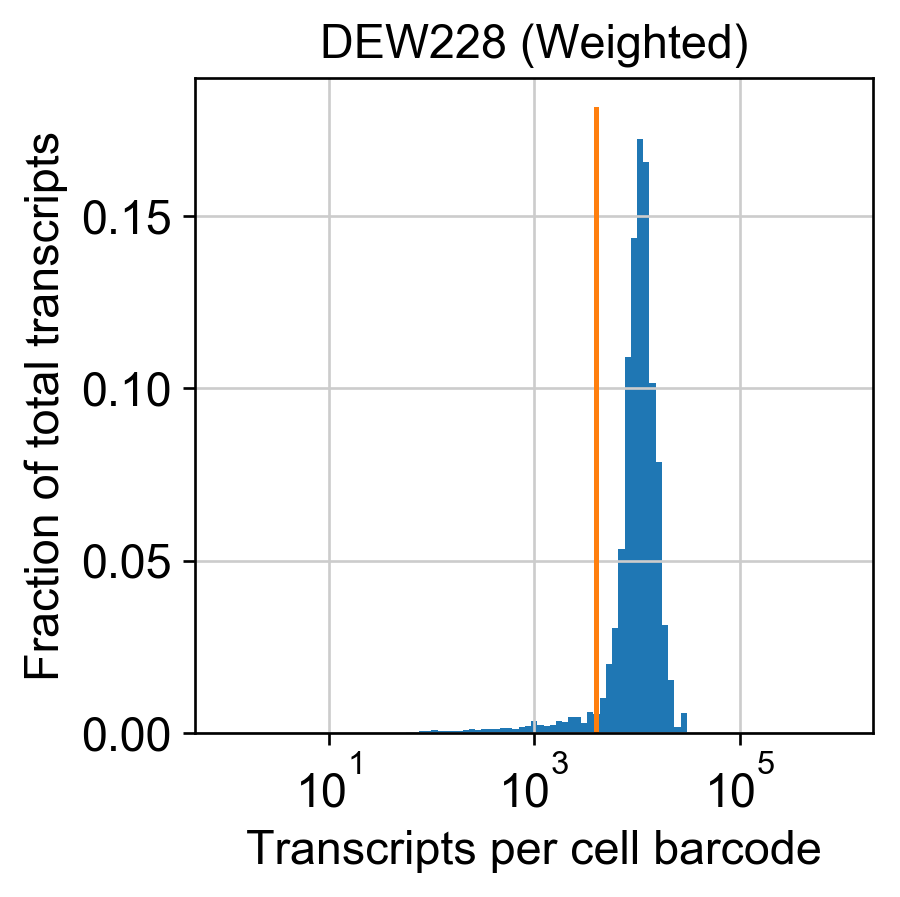

Filtering barcodes for DEW228  ( 1287 / 2825 )
filtered out 1538 cells that have less than 4000 counts


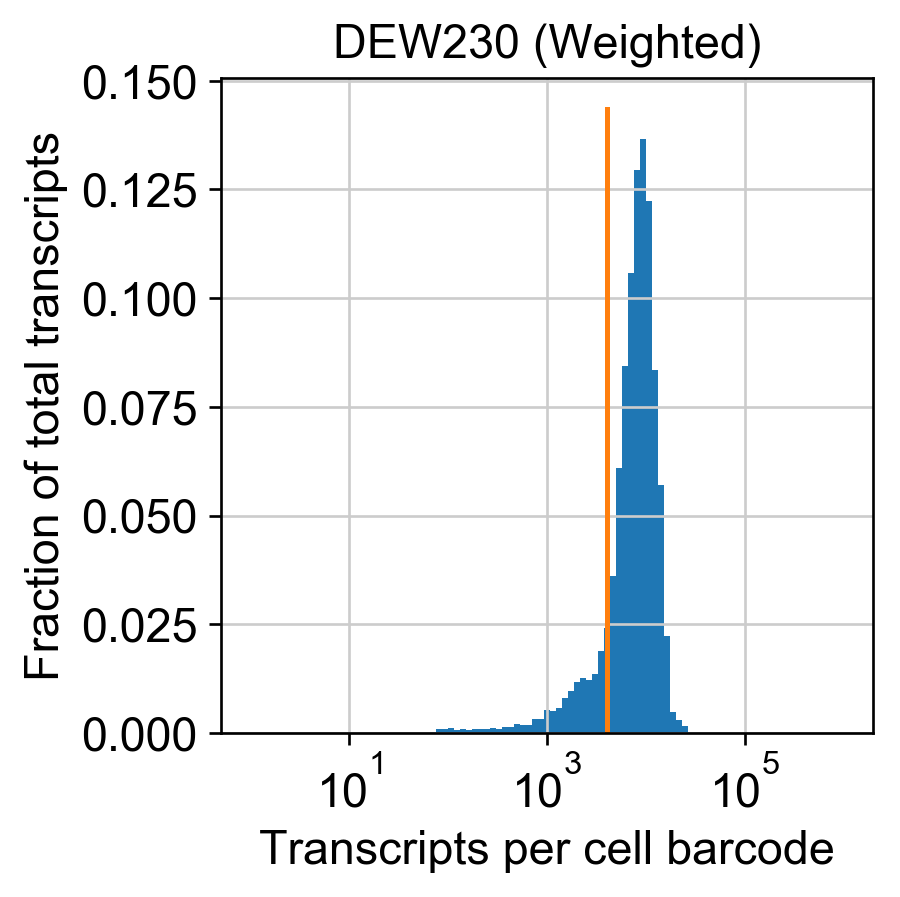

Filtering barcodes for DEW230  ( 1603 / 3952 )
filtered out 2349 cells that have less than 4000 counts


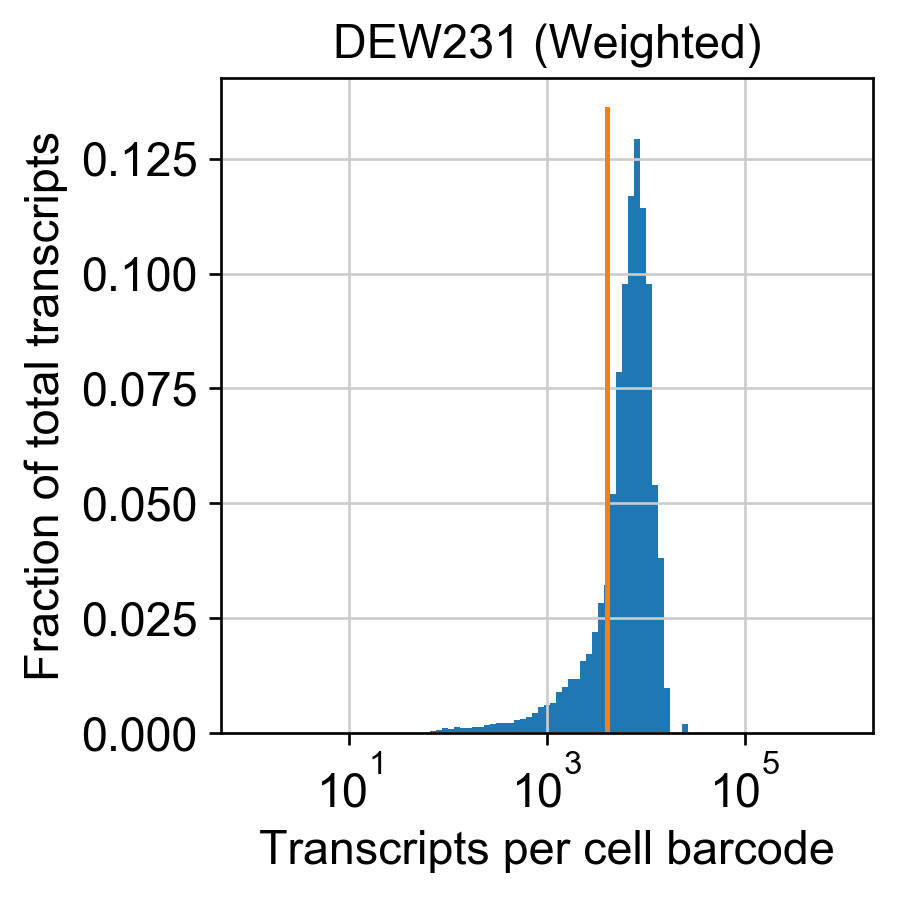

Filtering barcodes for DEW231  ( 1464 / 4378 )
filtered out 2914 cells that have less than 4000 counts

 AnnData object with n_obs × n_vars = 21504 × 40523 
    obs: 'batch', 'cell_names', 'library_id', 'n_counts', 'unique_cell_id'


In [3]:
# load libraries
#input_path = '/Users/dan/Dropbox (HMS)/Data/inDrops/OP_Oscillations/' # full path to all inDrops datasets
input_path = '../_rawData/' # full path to all inDrops datasets
libnames_mmES = ['DEW209','DEW210','DEW213','DEW214','DEW216','DEW217','DEW219','DEW220',
                 'DEW221','DEW222','DEW224','DEW225','DEW227','DEW228','DEW230','DEW231']
mmES = dew.load_inDrops_V3(libnames_mmES, input_path)

# set barcode abundance threshold
mmES['DEW209']['adata'].uns['counts_thresh'] = 4000
mmES['DEW210']['adata'].uns['counts_thresh'] = 4000
mmES['DEW213']['adata'].uns['counts_thresh'] = 4000
mmES['DEW214']['adata'].uns['counts_thresh'] = 4000
mmES['DEW216']['adata'].uns['counts_thresh'] = 4000
mmES['DEW217']['adata'].uns['counts_thresh'] = 4000
mmES['DEW219']['adata'].uns['counts_thresh'] = 4000
mmES['DEW220']['adata'].uns['counts_thresh'] = 4000
mmES['DEW221']['adata'].uns['counts_thresh'] = 4000
mmES['DEW222']['adata'].uns['counts_thresh'] = 4000
mmES['DEW224']['adata'].uns['counts_thresh'] = 4000
mmES['DEW225']['adata'].uns['counts_thresh'] = 4000
mmES['DEW227']['adata'].uns['counts_thresh'] = 4000
mmES['DEW228']['adata'].uns['counts_thresh'] = 4000
mmES['DEW230']['adata'].uns['counts_thresh'] = 4000
mmES['DEW231']['adata'].uns['counts_thresh'] = 4000

# perform filtering
for s in libnames_mmES:
    dew.filter_abundant_barcodes(mmES[s]['adata']) # filter and save histogram plots to file
    
# merge all libraries    
mmES = mmES['DEW209']['adata'].concatenate(mmES['DEW210']['adata'],mmES['DEW213']['adata'],mmES['DEW214']['adata'],
                                           mmES['DEW216']['adata'],mmES['DEW217']['adata'],mmES['DEW219']['adata'],
                                           mmES['DEW220']['adata'],mmES['DEW221']['adata'],mmES['DEW222']['adata'],
                                           mmES['DEW224']['adata'],mmES['DEW225']['adata'],mmES['DEW227']['adata'],
                                           mmES['DEW228']['adata'],mmES['DEW230']['adata'],mmES['DEW231']['adata'],)
print('\n',mmES)

### Add Library Annotations

In [4]:
# Specify timepoints and samples for each library_id
timepoint_dict = {'d0':['DEW209','DEW210'],
                  'd2':['DEW213','DEW214'],
                  'd3':['DEW216','DEW217','DEW224','DEW225'],
                  'd4':['DEW219','DEW220','DEW227','DEW228'],
                  'd5':['DEW221','DEW222','DEW230','DEW231']}

sample_dict = {'d0_1':['DEW209','DEW210'],
               'd2_1':['DEW213','DEW214'],
               'd3_1':['DEW216','DEW217'],
               'd3_2':['DEW224','DEW225'],
               'd4_1':['DEW219','DEW220'],
               'd4_2':['DEW227','DEW228'],
               'd5_1':['DEW221','DEW222'],
               'd5_2':['DEW230','DEW231']}

# Invert the dictionaries
timepoint_dict_inv = dict((v,k) for k in timepoint_dict for v in timepoint_dict[k])
sample_dict_inv = dict((v,k) for k in sample_dict for v in sample_dict[k])

# Generate per cell annotations
timepoint_id = []
sample_id = []
for s in mmES.obs['library_id']:
    timepoint_id.append(timepoint_dict_inv[s])
    sample_id.append(sample_dict_inv[s])
mmES.obs['time_id'] = timepoint_id
mmES.obs['sample_id'] = sample_id

### Save AnnData DataSet to File

In [5]:
mmES.obs.to_csv('Diaz2019_mmES_loaded_obs.csv')
mmES.write('Diaz2019_mmES_loaded.h5ad')

... storing 'cell_names' as categorical
... storing 'library_id' as categorical
... storing 'time_id' as categorical
... storing 'sample_id' as categorical


### Process & Normalize

In [6]:
# Perform basic filtering
sc.pp.filter_cells(mmES, min_genes=250)

# Before doing any further processing, store a logarithmized version of the raw data
mmES.raw = sc.pp.log1p(mmES, copy=True)

# Save current n_counts as n_counts_pre_norm
mmES.obs['n_counts_pre_norm'] = mmES.obs['n_counts']

# Perform total counts normalization
sc.pp.normalize_total(mmES)

# Logarithmize the data
sc.pp.log1p(mmES)

# Identify highly variable genes
sc.pp.highly_variable_genes(mmES, n_top_genes=2000)

# Scale the data
sc.pp.scale(mmES)

filtered out 26 cells that have less than 250 genes expressed
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


### Compute Embeddings

In [7]:
# Perform PCA and construct a batch-balanced neighbor graph
sc.tl.pca(mmES, n_comps=50, svd_solver='arpack')
bbknn.bbknn(mmES, batch_key='batch', approx=True, metric='euclidean', local_connectivity=3, trim=12)
dew.export_to_graphml(mmES, filename='gephi/mmES_bb.graphml')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:08.33)
computing batch balanced neighbors
	finished (0:00:28.32) --> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix


In [8]:
# Compute layout of the single-cell graph with ForceAtlas2
#sc.tl.draw_graph(mmES, layout='fa', iterations=1000, random_state=0) # random_state=0 by default

# Alternatively, import interactive ForceAtlas2 layout from Gephi
mmES = dew.import_pajek_xy(mmES, filename='gephi/mmES_bb.net')

drawing single-cell graph using layout "fa"
    finished (0:00:02.61) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


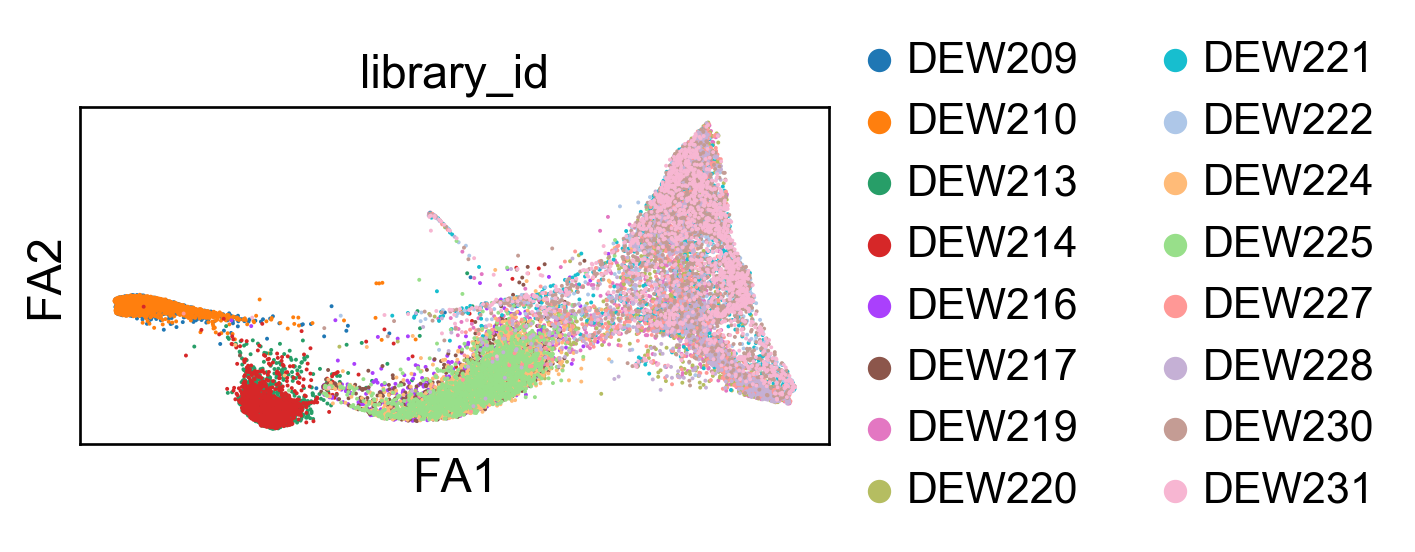

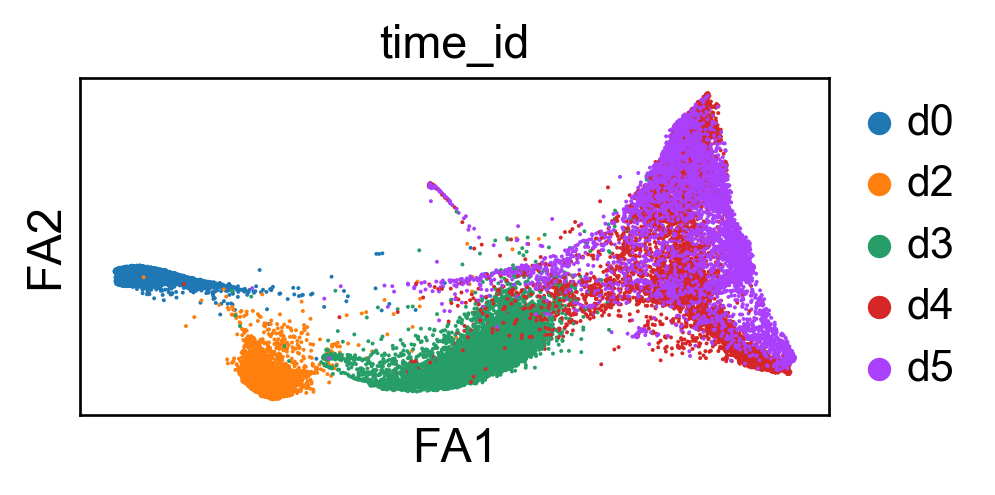

In [9]:
# Plot the ForceAtlas2 graph
sc.pl.draw_graph(mmES, color=['library_id'], edges=False, layout='fa', show=False); dew.format_axes() 
sc.pl.draw_graph(mmES, color=['time_id'], edges=False, layout='fa', show=False); dew.format_axes() 

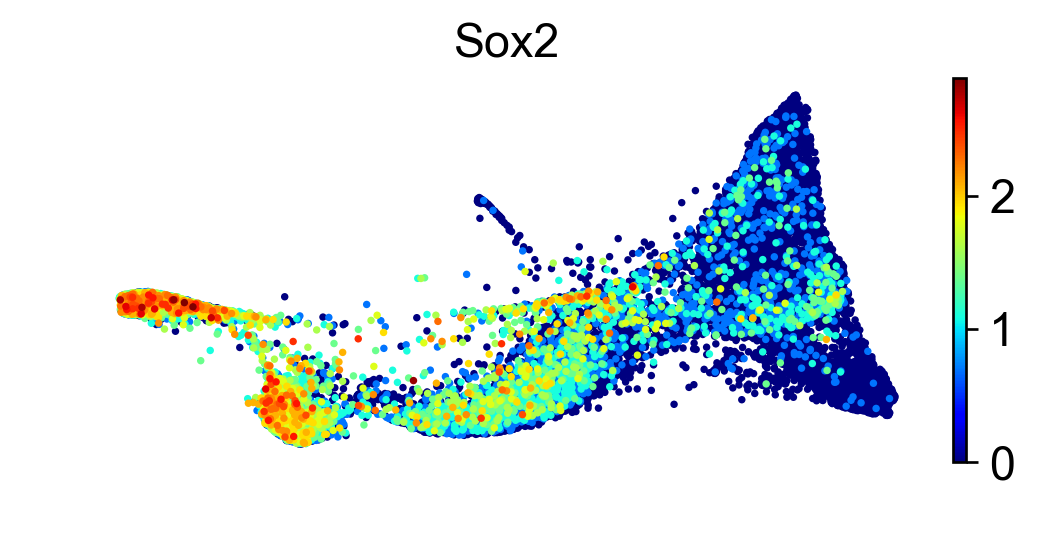

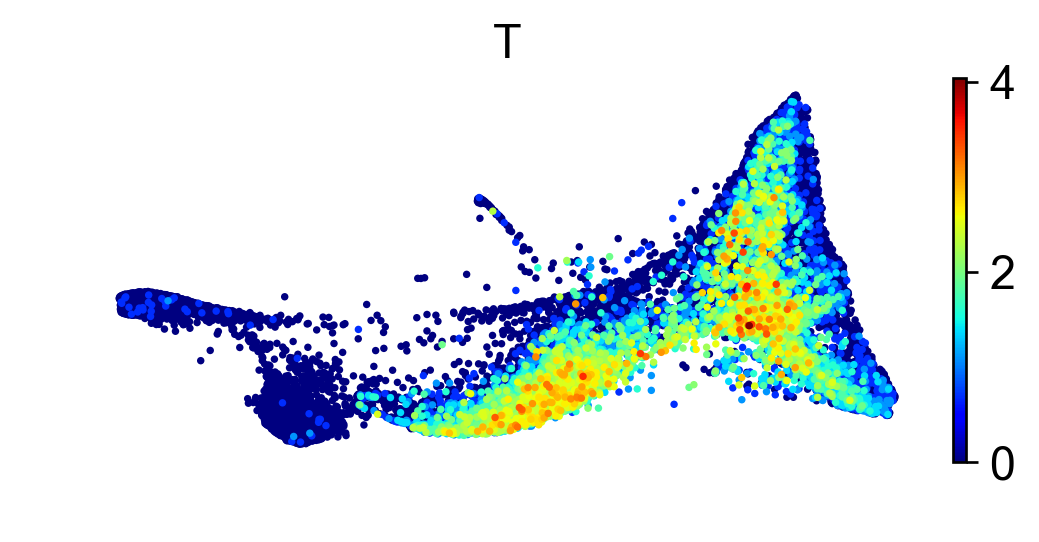

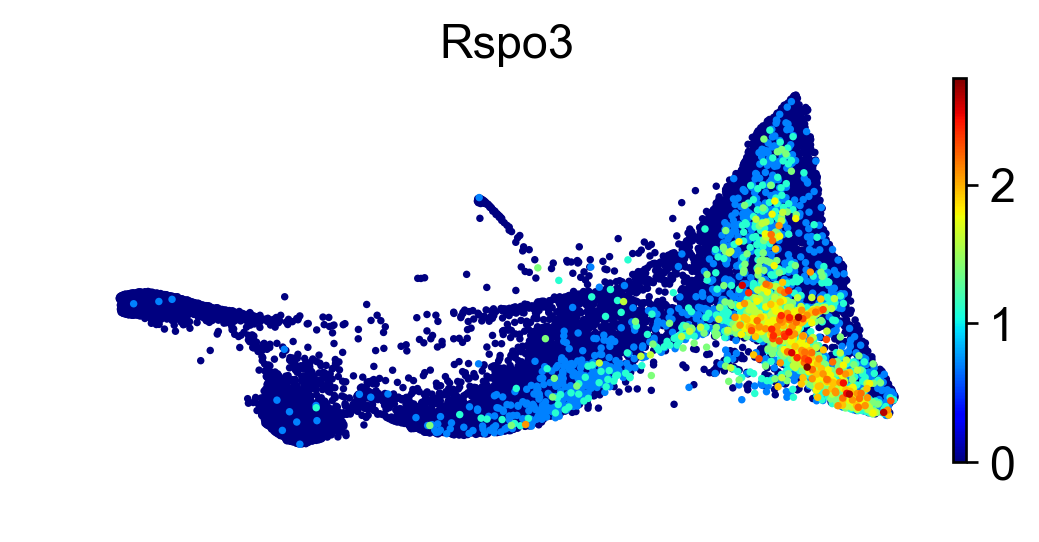

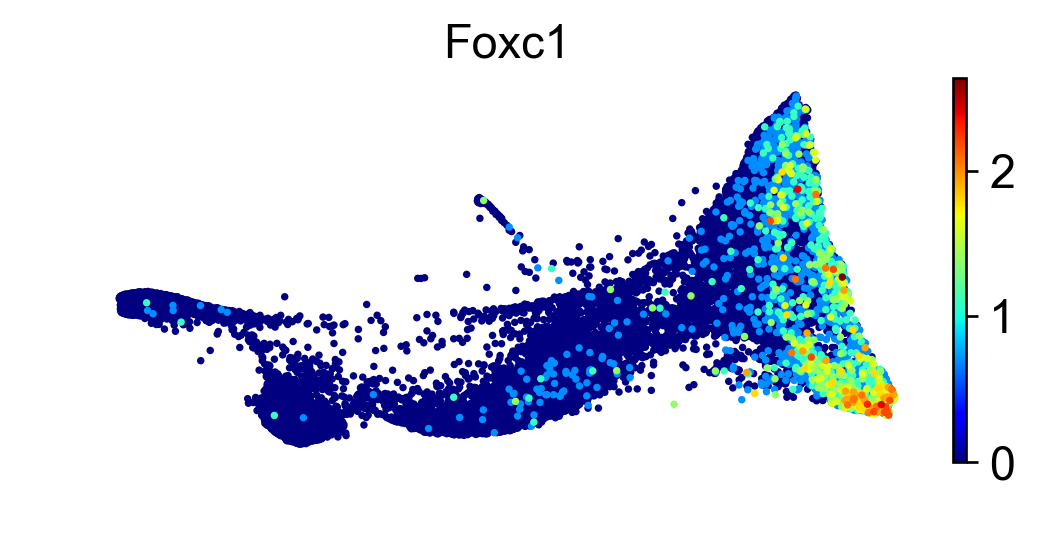

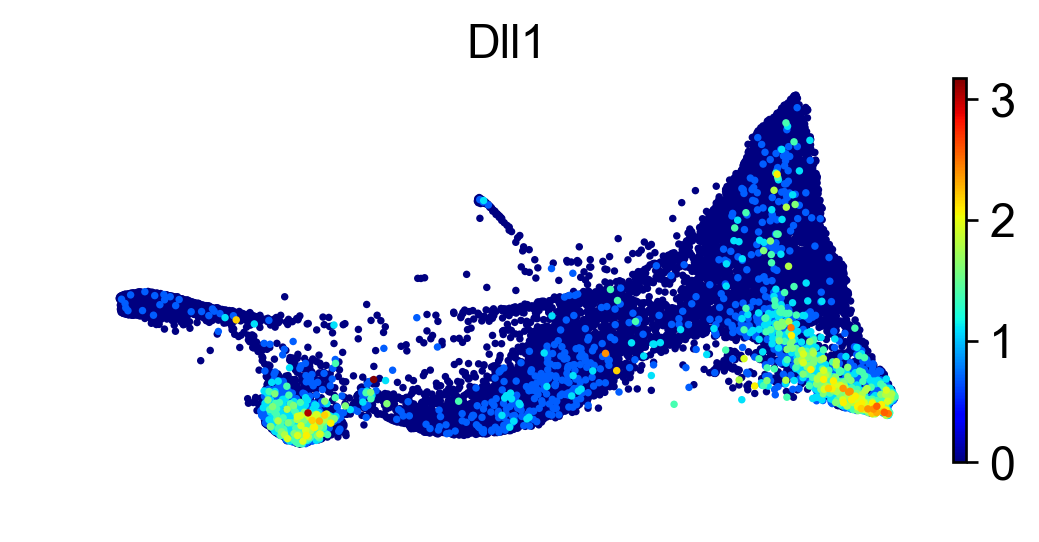

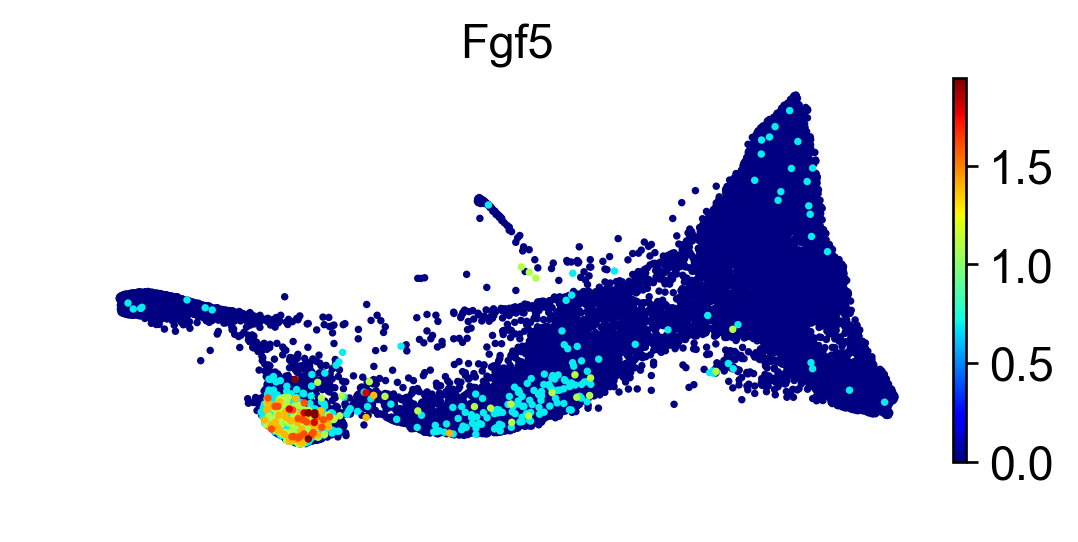

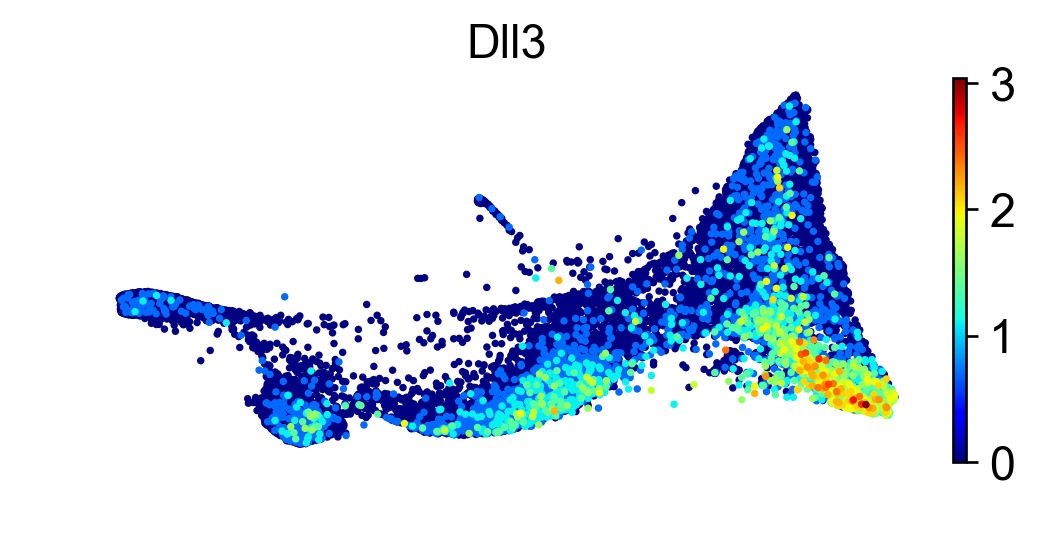

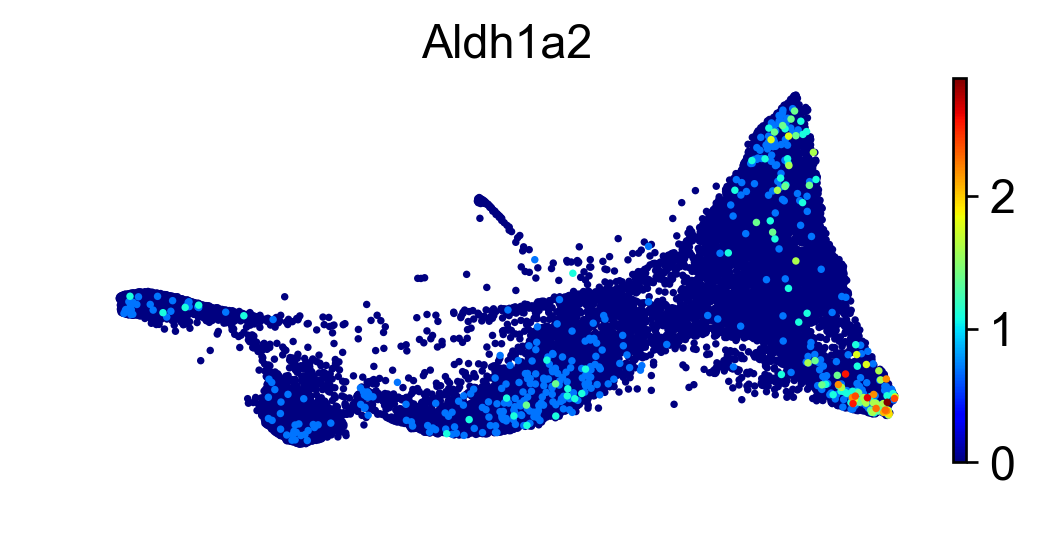

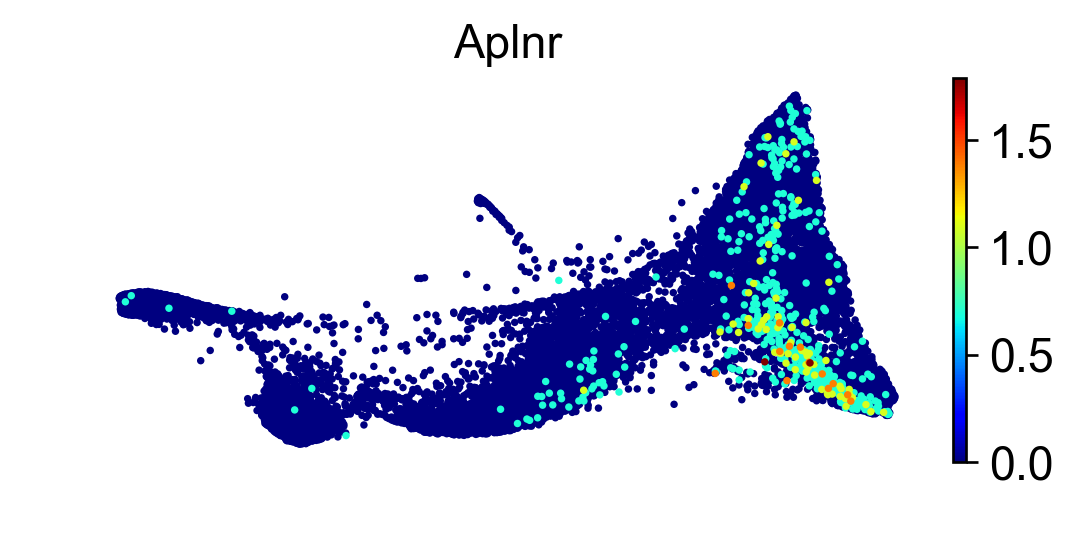

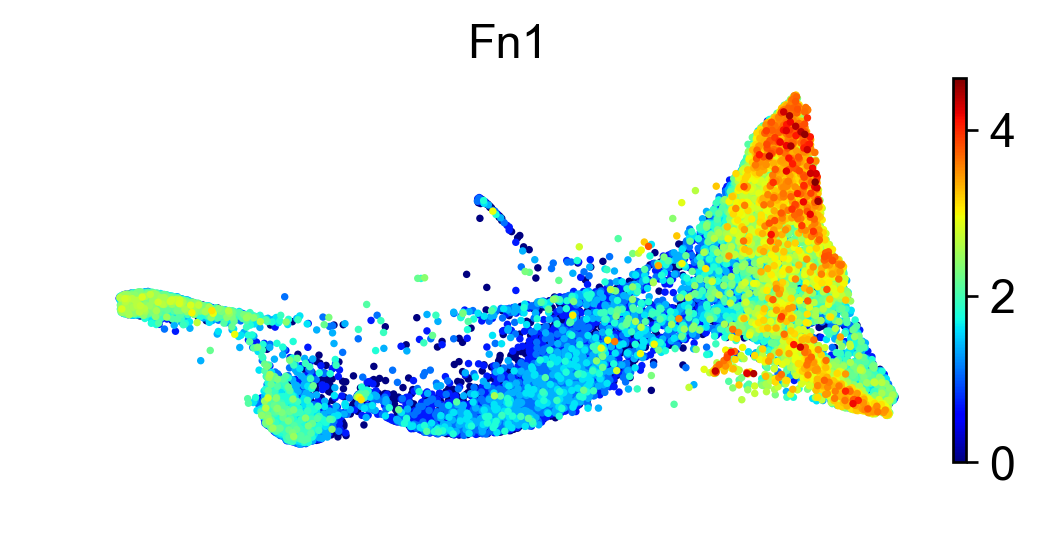

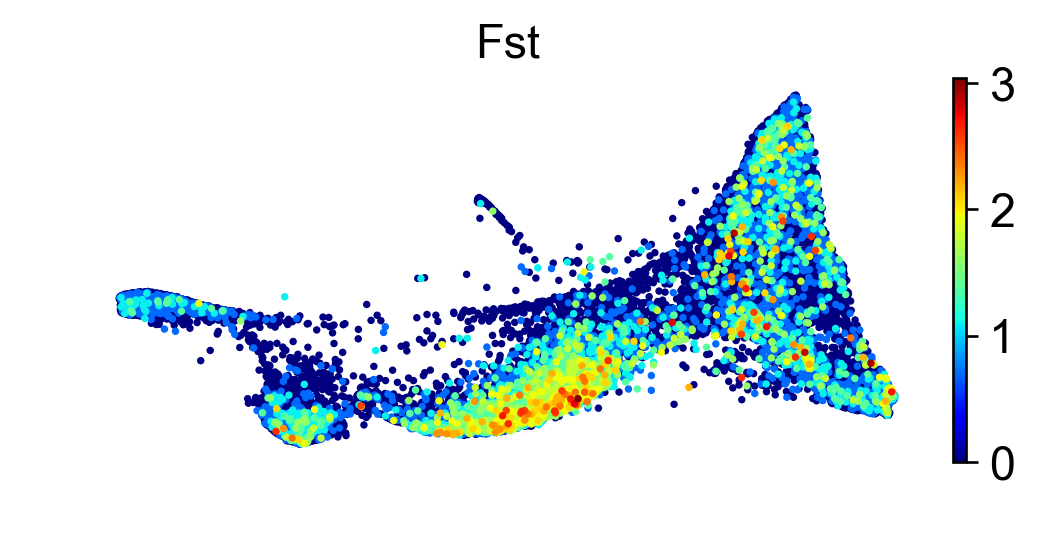

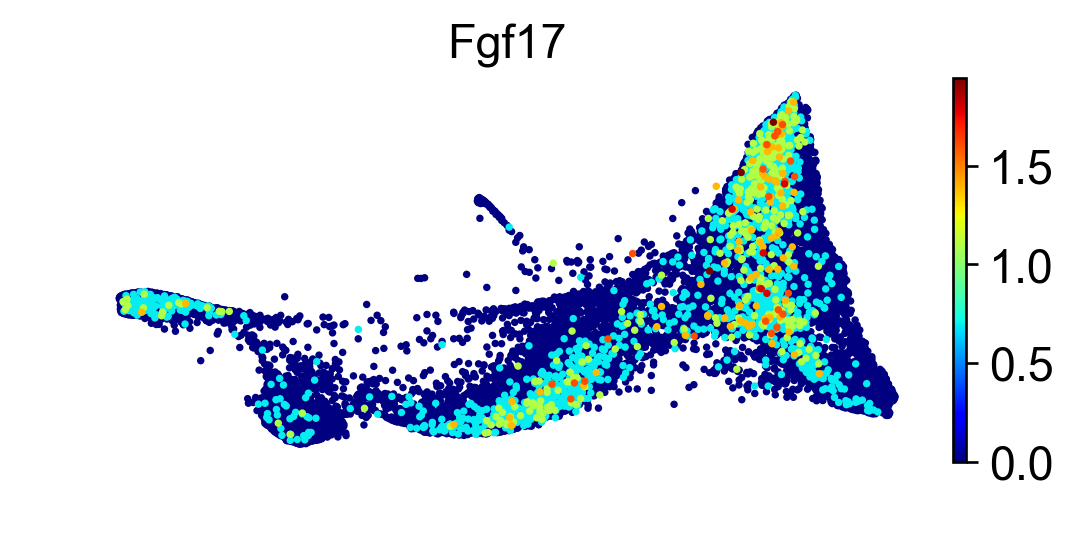

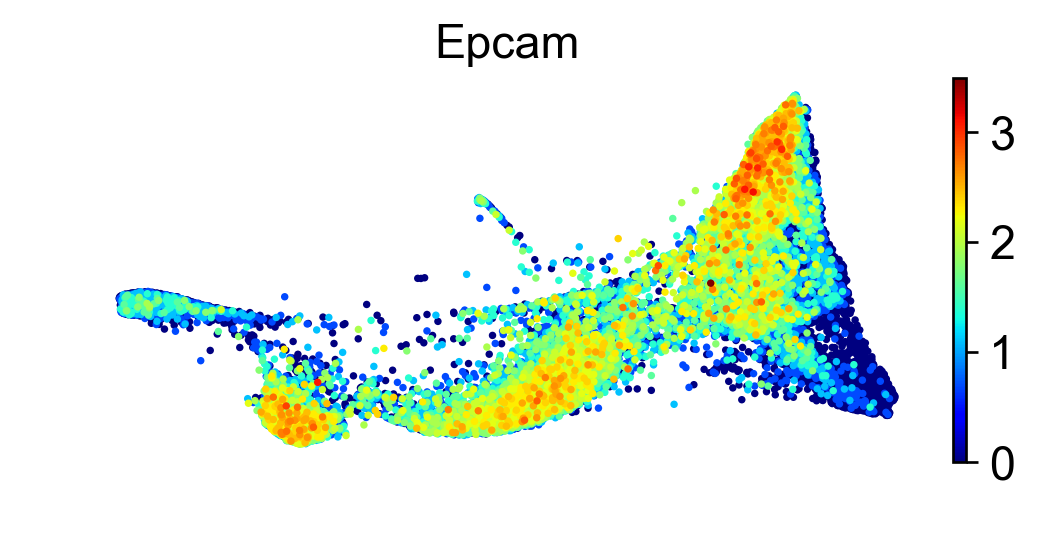

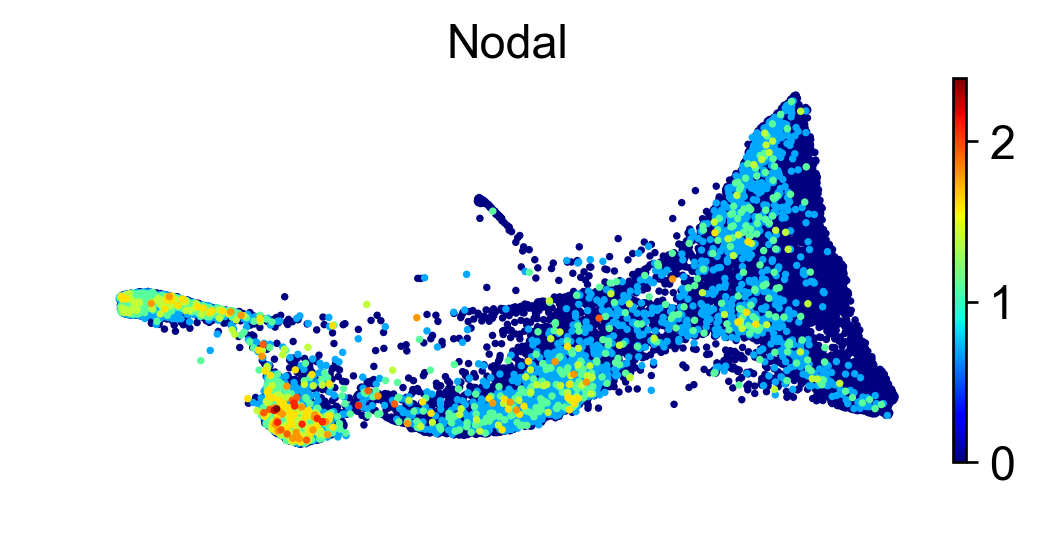

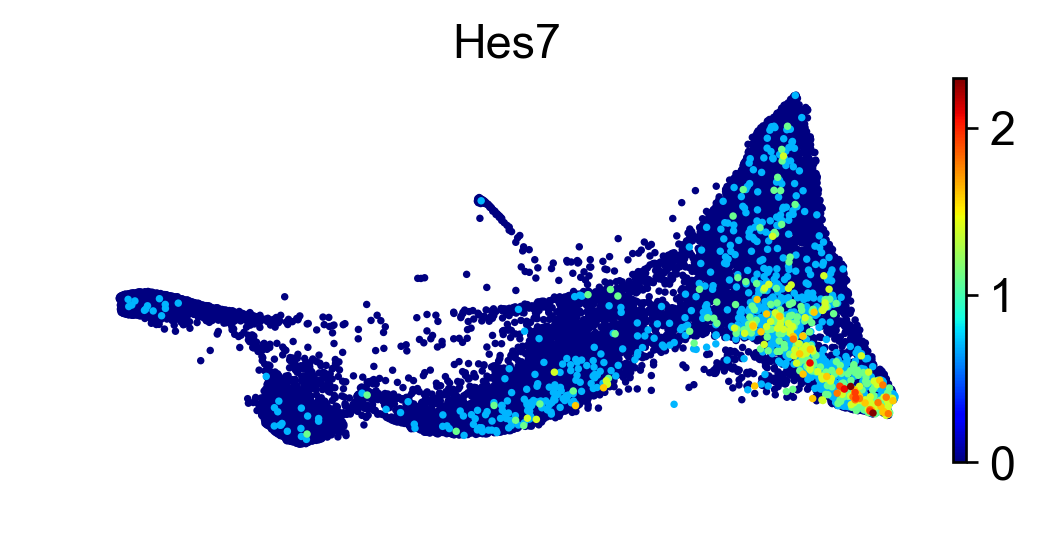

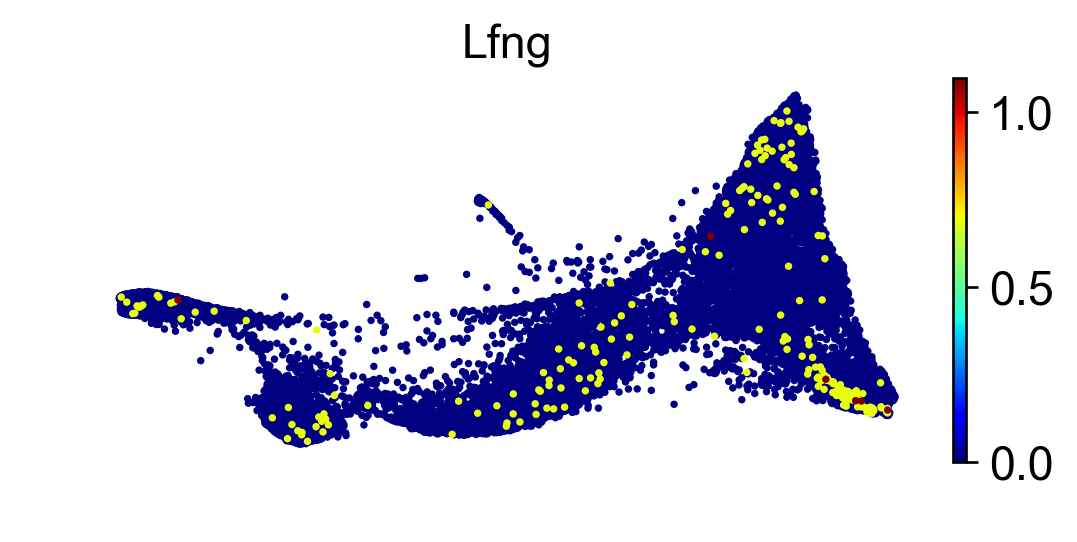

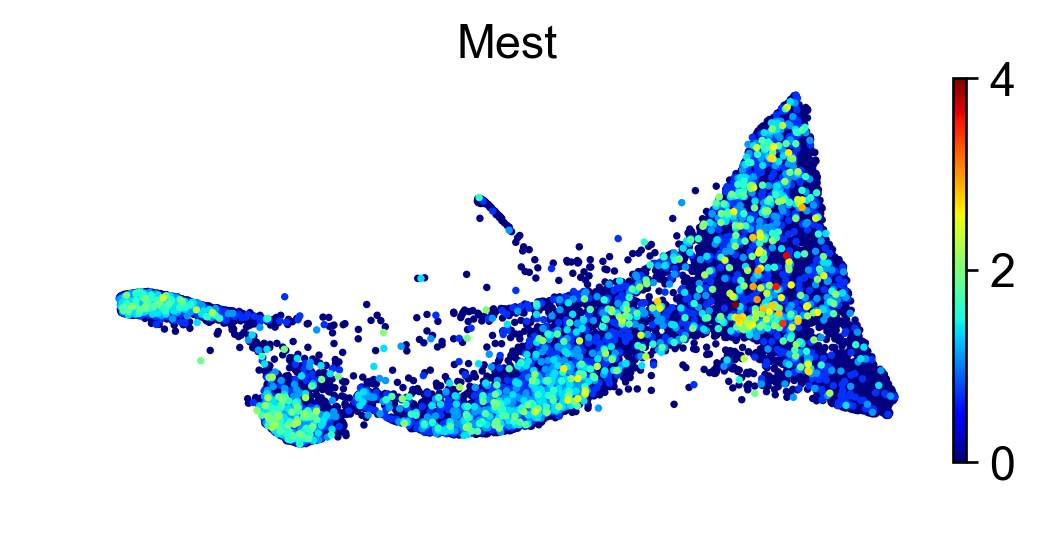

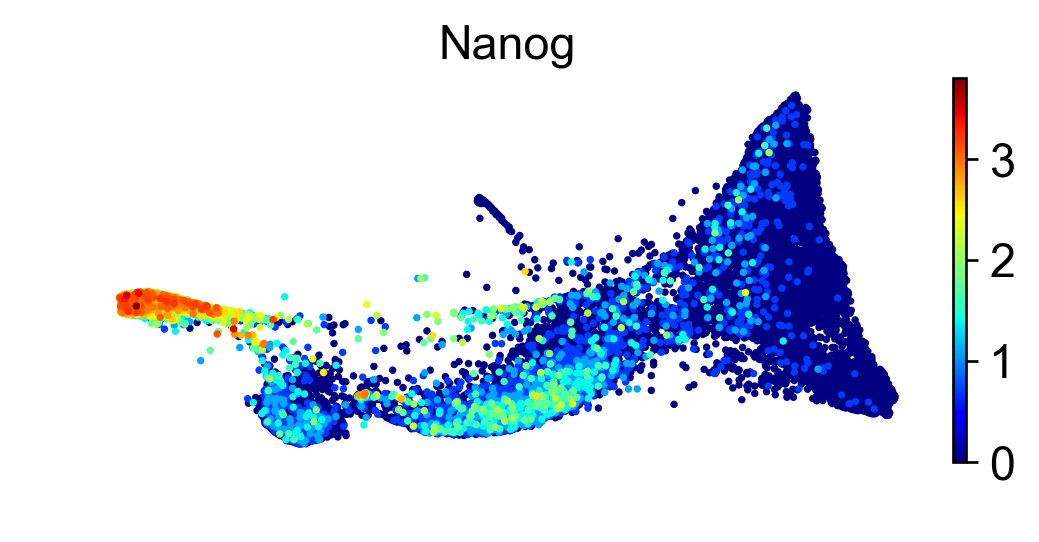

In [10]:
# Overlay gene expression values
genes = ['Sox2','T','Rspo3','Foxc1', 'Dll1', 'Fgf5', 'Dll3', 'Aldh1a2', 'Aplnr', 'Fn1', 'Fst', 
         'Fgf17', 'Epcam','Nodal','Hes7','Lfng','Mest','Nanog']

for gn in genes:
    sc.pl.draw_graph(mmES, size=20, use_raw=True, color=[gn], edges=False, frameon=False, legend_loc='None',
                     legend_fontsize=10, legend_fontweight='bold', cmap='jet', show=False, title=gn)
    dew.format_axes(eq_aspect=[0], rm_colorbar=False)
    plt.subplots_adjust(bottom=0, left=0, right=2, top=0.4)
    plt.savefig('figures/draw_graph_fa_mmES_gene_'+gn+'.png', dpi=600, bbox_inches='tight')    

### Perform Clustering

In [11]:
# Leiden and Louvain clustering
sc.tl.leiden(mmES, resolution=0.10, use_weights=True, random_state=0)
sc.tl.louvain(mmES, resolution=0.13, use_weights=True, random_state=0)

running Leiden clustering
    finished (0:00:06.52) --> found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:06.89) --> found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


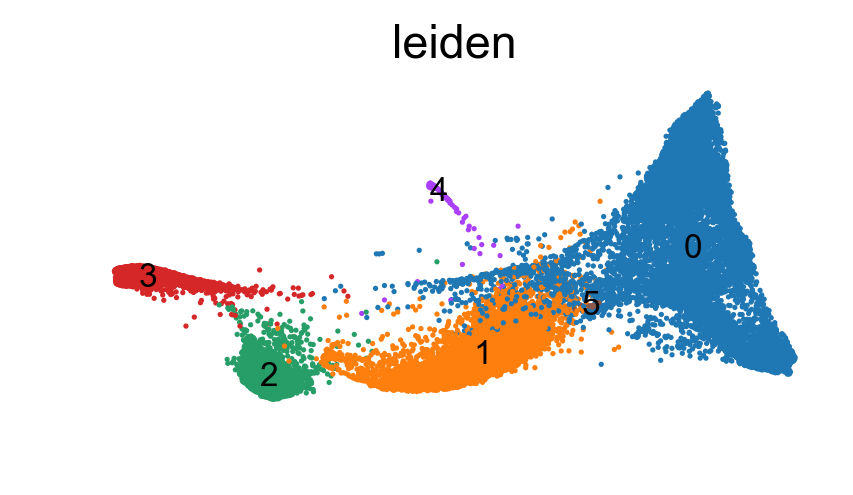

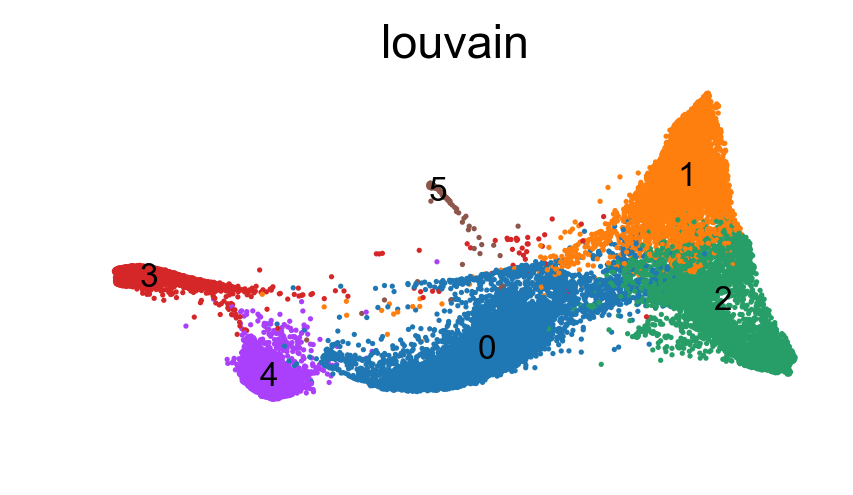

In [12]:
# Overlay cell cluster assignments
sc.pl.draw_graph(mmES, size=10, color=['leiden'], edges=False, legend_loc='on data',
                 legend_fontsize=10, legend_fontweight='medium', show=False, frameon=False)
dew.format_axes() 

sc.pl.draw_graph(mmES, size=10, color=['louvain'], edges=False, legend_loc='on data',
                 legend_fontsize=10, legend_fontweight='medium', show=False, frameon=False)
dew.format_axes() 


In [13]:
# Manual annotation of cluster names
new_leiden_names = ['d4-5', 'd3', 'd2', 'd0', 'd4-5 2', 'd4-5 3'] 
new_louvain_names = ['d3 NMP', 'd4-5 Krt', 'd4-5 pPSM', 'd0 ESC', 'd2 Epi', 'd4-5 Col4'] # 0-6
mmES.rename_categories('leiden', new_leiden_names)
mmES.rename_categories('louvain', new_louvain_names)
mmES.obs['louvain'].cat.reorder_categories(['d0 ESC','d2 Epi','d3 NMP', 'd4-5 Col4', 'd4-5 Krt', 'd4-5 pPSM'], inplace = True)


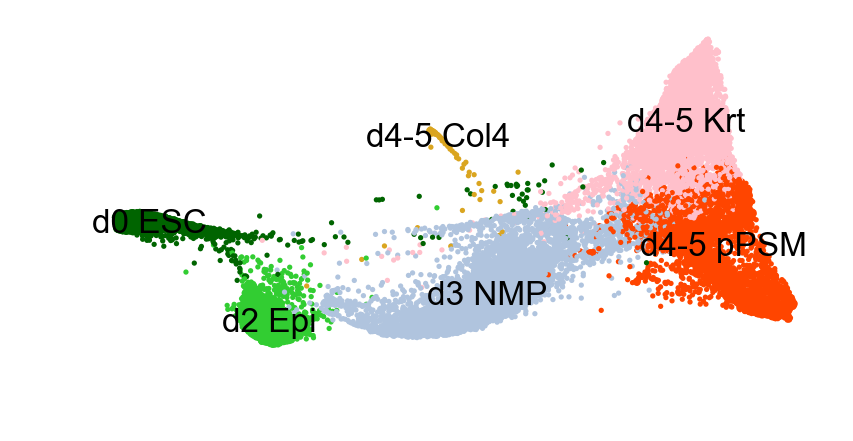

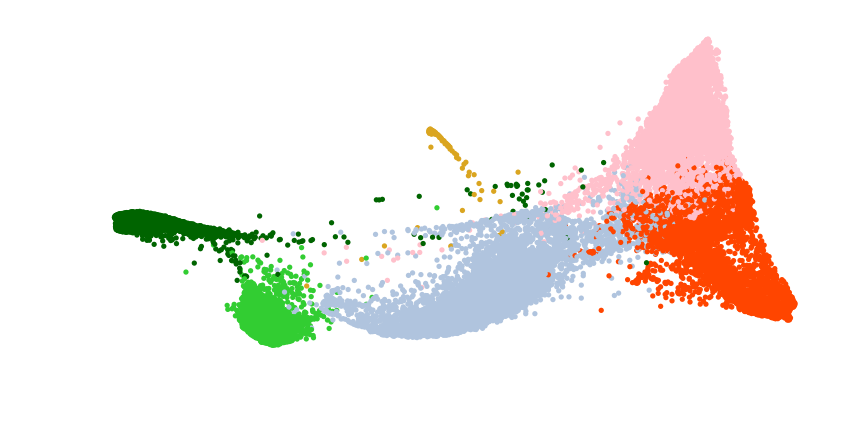

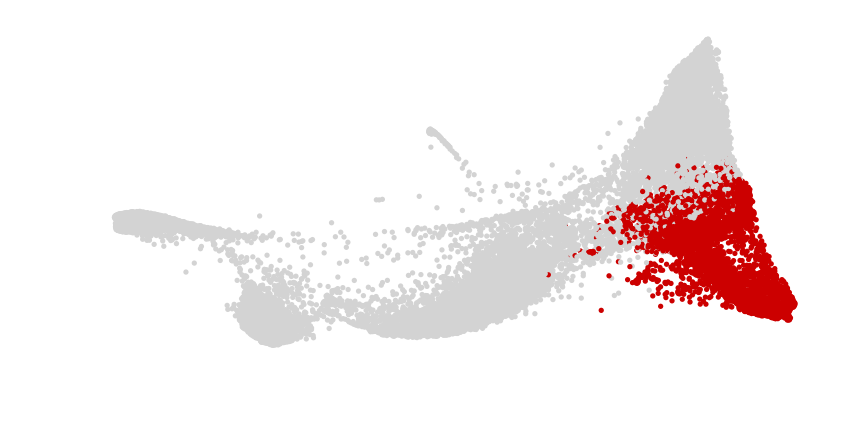

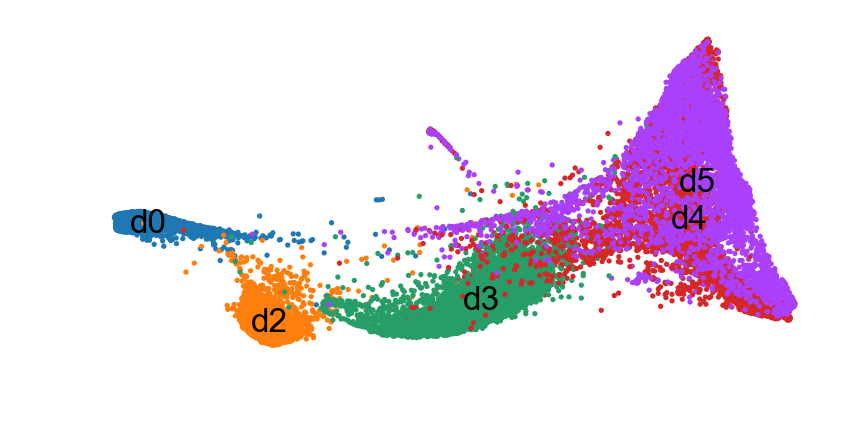

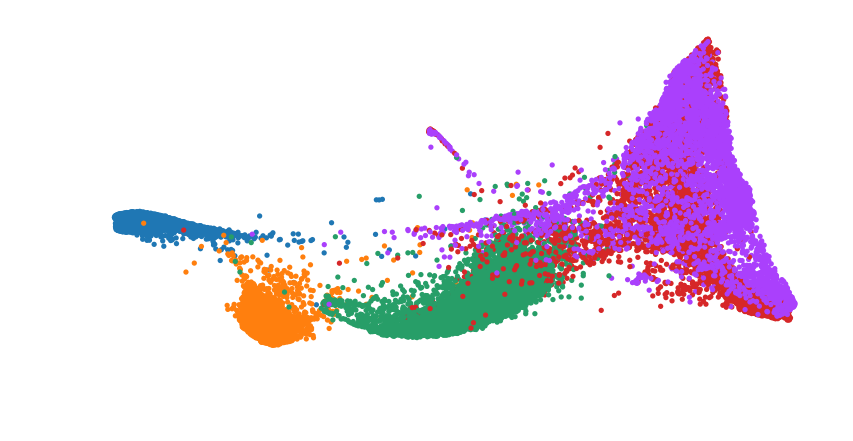

In [14]:
# Overlay new cluster assignments
# Louvain+labels
sc.pl.draw_graph(mmES, color=['louvain'], palette=['darkgreen','limegreen','lightsteelblue','goldenrod','pink','orangered'], size=10, edges=False, frameon=False, title='', legend_loc='on data', legend_fontsize=10, legend_fontweight='medium', show=False)
dew.format_axes() 
plt.savefig('figures/draw_graph_fa_mmES_louvain.png', dpi=600, bbox_inches='tight')

# Louvain no labels
sc.pl.draw_graph(mmES, color=['louvain'], size=10, edges=False, frameon=False, title='', legend_loc='none', legend_fontsize=10, legend_fontweight='medium', show=False)
dew.format_axes() 
plt.savefig('figures/draw_graph_fa_mmES_louvain_nolabel.png', dpi=600, bbox_inches='tight')

# Louvain no labels - d4-5 PSM 
sc.pl.draw_graph(mmES, color=['louvain'], groups=['d4-5 pPSM'], palette=[(0.8,0,0)], size=10, edges=False, frameon=False, title='', legend_loc='none', legend_fontsize=10, legend_fontweight='medium', show=False)
dew.format_axes() 
plt.savefig('figures/draw_graph_fa_mmES_louvain_PSM_nolabel.png', dpi=600, bbox_inches='tight')

# Time+labels
sc.pl.draw_graph(mmES, color=['time_id'], size=10, edges=False, frameon=False, title='', legend_loc='on data', legend_fontsize=10, legend_fontweight='medium', show=False)
dew.format_axes() 
plt.savefig('figures/draw_graph_fa_mmES_timeid.png', dpi=600, bbox_inches='tight')

# Time no labels
sc.pl.draw_graph(mmES, color=['time_id'], size=10, edges=False, frameon=False, title='', legend_loc='none', legend_fontsize=10, legend_fontweight='medium', show=False)
dew.format_axes() 
plt.savefig('figures/draw_graph_fa_mmES_timeid_nolabel.png', dpi=600, bbox_inches='tight')


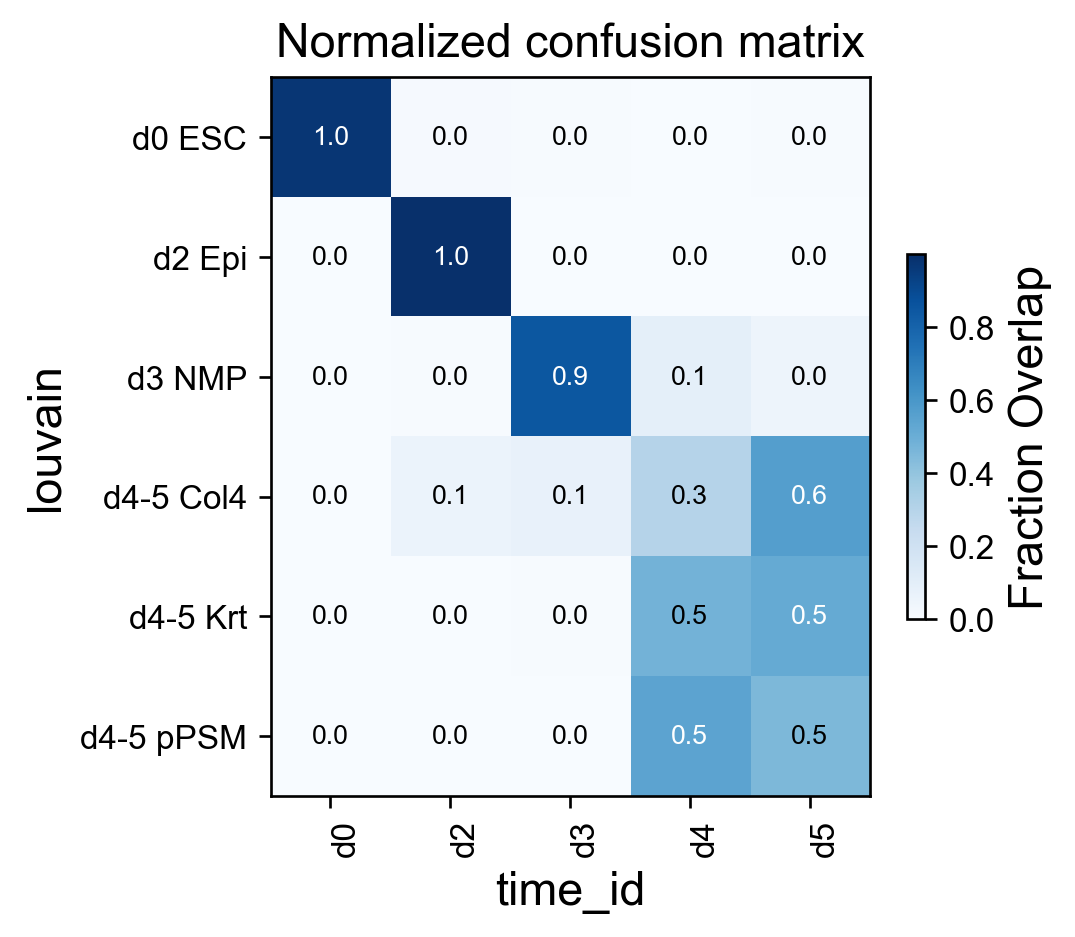

In [15]:
# Plot a confusion matrix to compare clustering assignments
fg,ax = dew.plot_confusion_matrix(mmES.obs['time_id'], mmES.obs['louvain'], normalize=True, overlay_values=True)
fg.savefig('./figures/confmat_mmES_louvaintime.png', bbox_inches='tight')

In [16]:
print('nCells in d4-5 Col4: '+str(sum(mmES.obs['louvain'].isin(['d4-5 Col4']))))
print('nCells in d4-5 Krt: '+str(sum(mmES.obs['louvain'].isin(['d4-5 Krt']))))
print('nCells in d4-5 pPSM: '+str(sum(mmES.obs['louvain'].isin(['d4-5 pPSM']))))

nCells in d4-5 Col4: 83
nCells in d4-5 Krt: 4989
nCells in d4-5 pPSM: 4352


### Get Marker Genes

In [17]:
sc.tl.rank_genes_groups(mmES, 'louvain', use_raw=True, groups='all', reference='rest', n_genes=100, 
                        method='wilcoxon', corr_method='benjamini-hochberg', log_transformed=True)

ranking genes
    finished (0:01:39.64) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [18]:
# Generate a tables of differentially expressed genes for each group
deg = mmES.uns['rank_genes_groups']
groups = deg['names'].dtype.names

# Format a table with top 100 gene names and corrected p-values, export to excel
df_names_pvals = pd.DataFrame({groups+'_'+key: deg[key][groups] for groups in groups for key in ['names','logfoldchanges','pvals']}).head(100)
df_names_pvals.to_excel('tables/mmES_DEGTable.xlsx')

In [19]:
# Print top 20 gene names to screen
pd.DataFrame({groups : deg[key][groups] for groups in groups for key in ['names']}).head(20)

d0 ESC   d2 Epi   d3 NMP d4-5 Col4  d4-5 Krt d4-5 pPSM
0         Tdh     Utf1   Isyna1    Col4a1      Krt8      Gpc3
1       Nanog   Rbpms2        T    Col4a2     Krt18    Ifitm1
2        Klf2    Tdgf1  Pla2g1b     Lama1    Tmsb4x     Hmga2
3       Zfp42   Pou3f1    Grsf1     Gata6     Tagln      Gnas
4        Spp1   Dnmt3a      Oat     Lamb1     Ahnak       Mdk
5       Esrrb     Pim2      Fst      Dab2    Lgals1   Hoxaas3
6        Jam2   Dnmt3b     Odc1      Fth1     Sparc      Tpm1
7     Tfcp2l1  Chchd10  Rangap1     Sparc      Tpm1     H2afy
8      Dppa5a     Cbx1    Mkrn1     Lamc1    S100a6   Hoxb5os
9        Lap3   Dppa5a      Emb     Sox17    Myl12a      Cdh2
10      Hspb1   Pou5f1      Cad    Lrpap1    Slc2a3     Rspo3
11     Fblim1    H2-Q4    Glud1      Srgn     Actn1    Hoxd11
12     Eif2s2     Mcl1   Dctpp1     Foxq1     Cald1     Hoxd9
13      Stmn2    Bnip3   Mrpl34      Cst3    Pdlim7      Lmo2
14  Gabarapl2    Mkrn1   Unc13d  Serpinh1  Serpinh1   Laptm4b
15      Mylpf     Upp1     Lyar     Flrt3      Wnt6     Hoxc9
16    Chchd10   Fam60a    Atp5k     Gata4    Phlda1    Rpl36a
17        Cd9  Slc38a2   Alox15    Atp1b1   S100a11      Gas5
18       Klf4   Dnmt3l     Bex4    Pdgfra    Tagln2      Scd2
19        Fry    L1td1    Nat8l     Ifi30    Tuba1a      Igf2

In [35]:
# Print number of cells in each cluster
nTotalCells = len(mmES.obs)
for name in np.unique(mmES.obs['louvain']):
    nCells = sum(mmES.obs['louvain'].isin([name]))
    fCells = nCells / nTotalCells * 100            
    print(name + ': ' + str(nCells))
print('Total nCells: ' + str(nTotalCells))

d0 ESC: 2379
d2 Epi: 2328
d3 NMP: 7347
d4-5 Col4: 83
d4-5 Krt: 4989
d4-5 pPSM: 4352
Total nCells: 21478


### Marker Gene Expression by Timepoints

saving figure to file ./figures/heatmap_hox_timeid.png


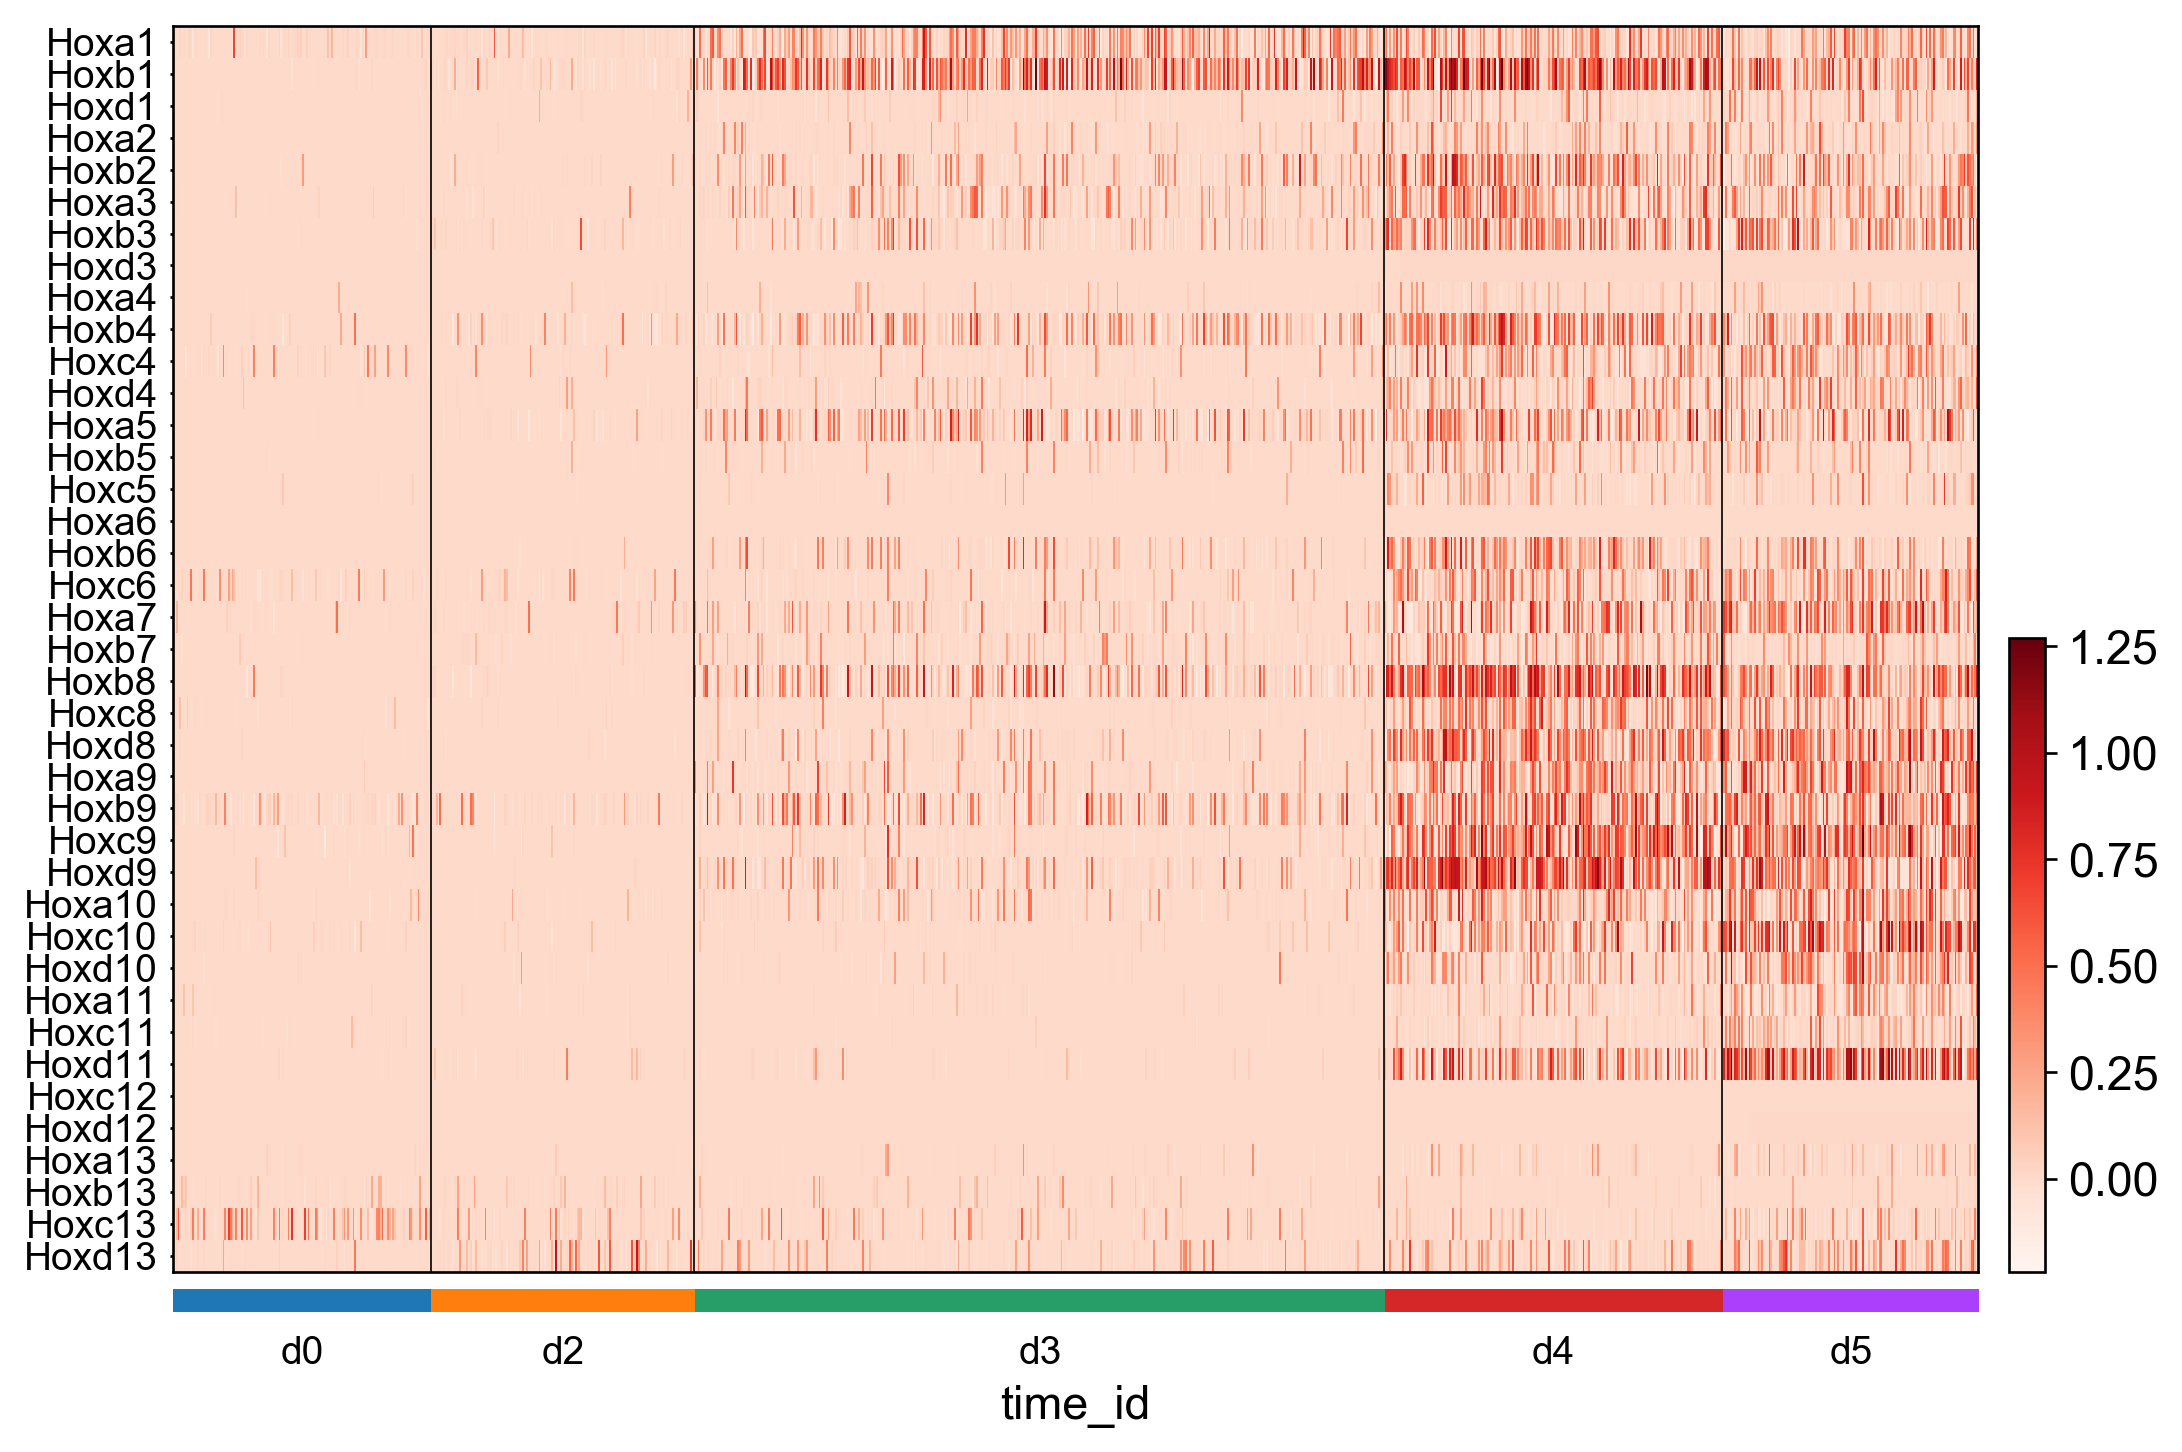

GridSpec(3, 3, height_ratios=[0, 7.02, 0.13], width_ratios=[10, 0, 0.2])

In [21]:
# Generate HOX Heatmap (Timepoints)
mouse_hox=['Hoxa1','Hoxb1','Hoxd1','Hoxa2','Hoxb2','Hoxa3','Hoxb3','Hoxd3','Hoxa4','Hoxb4','Hoxc4','Hoxd4','Hoxa5','Hoxb5','Hoxc5','Hoxa6','Hoxb6','Hoxc6','Hoxa7','Hoxb7','Hoxb8','Hoxc8','Hoxd8','Hoxa9','Hoxb9','Hoxc9','Hoxd9','Hoxa10','Hoxc10','Hoxd10','Hoxa11','Hoxc11','Hoxd11','Hoxc12','Hoxd12','Hoxa13','Hoxb13','Hoxc13','Hoxd13']    
mmES_sub = mmES[~mmES.obs['louvain'].isin(['d4-5 Krt','d4-5 Col4']),:]  # Subset only the PSM trajectory clusters
sc.pl.heatmap(mmES_sub, mouse_hox, groupby='time_id', use_raw=True, log=True, num_categories=7, 
              dendrogram=False, gene_symbols=None, var_group_positions=None, var_group_labels=None, 
              var_group_rotation=None, layer=None, standard_scale=None, swap_axes=True, 
              show_gene_labels=None, show=None, save='_hox_timeid.png', figsize=None, cmap='Reds')


### Predict Cell States Using EE95 Classifier

In [22]:
# Load E95Classifier and predict cell states
E95Classifier = pickle.load(open('../mmE95/E95Classifier.pickle','rb'))
mmES = dew.predict_classes(mmES, E95Classifier)

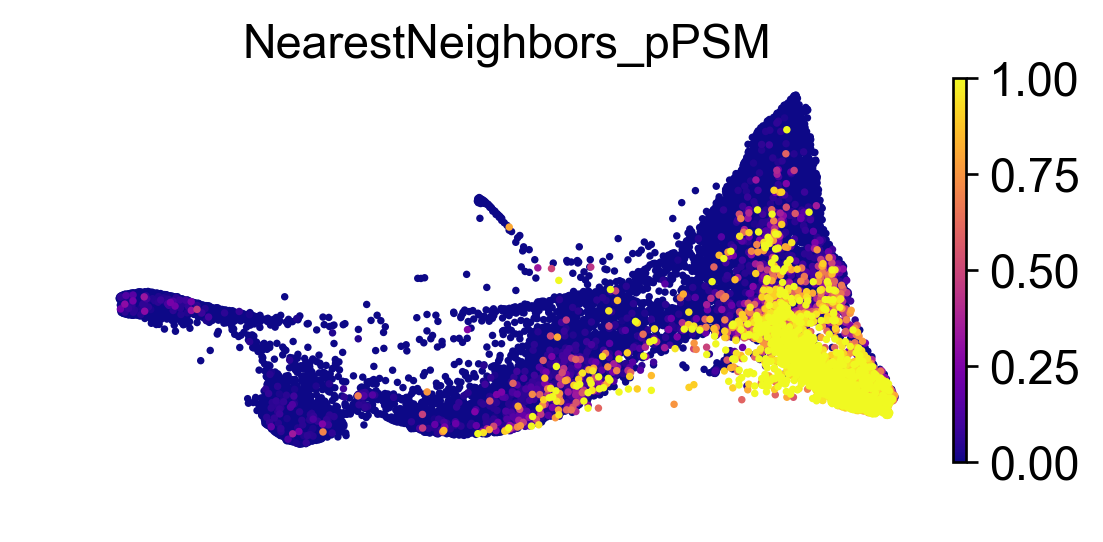

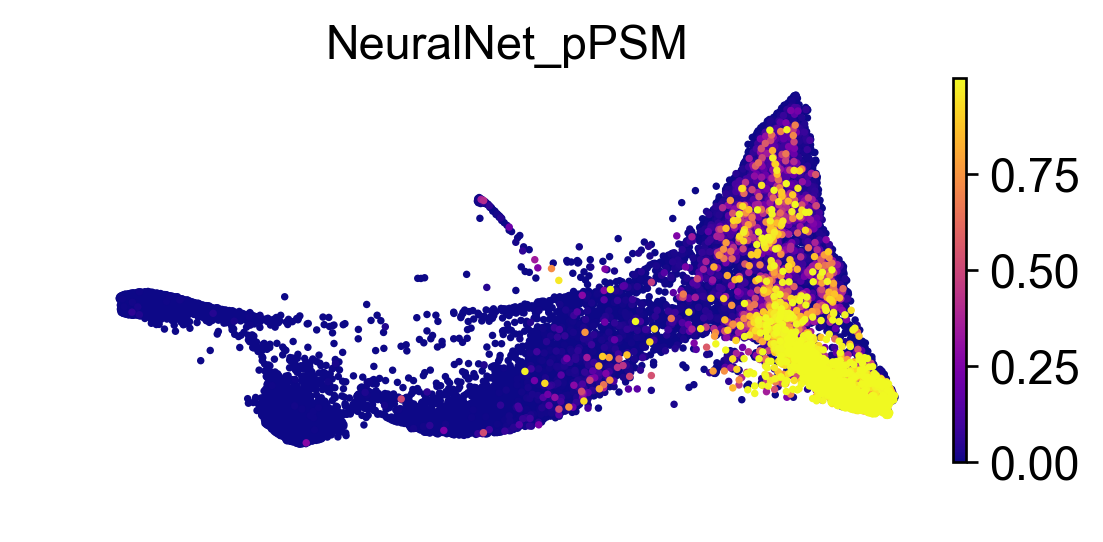

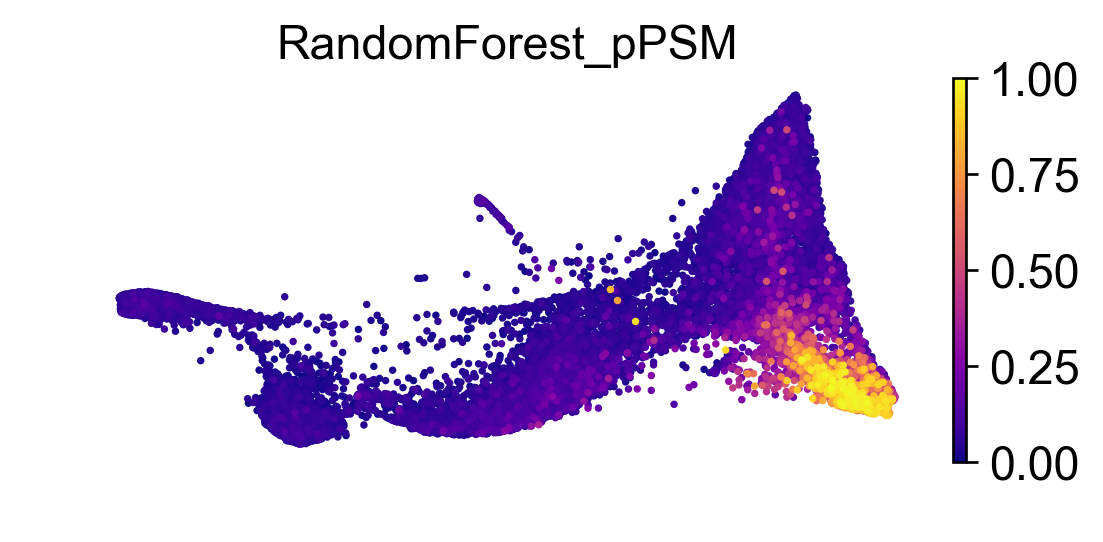

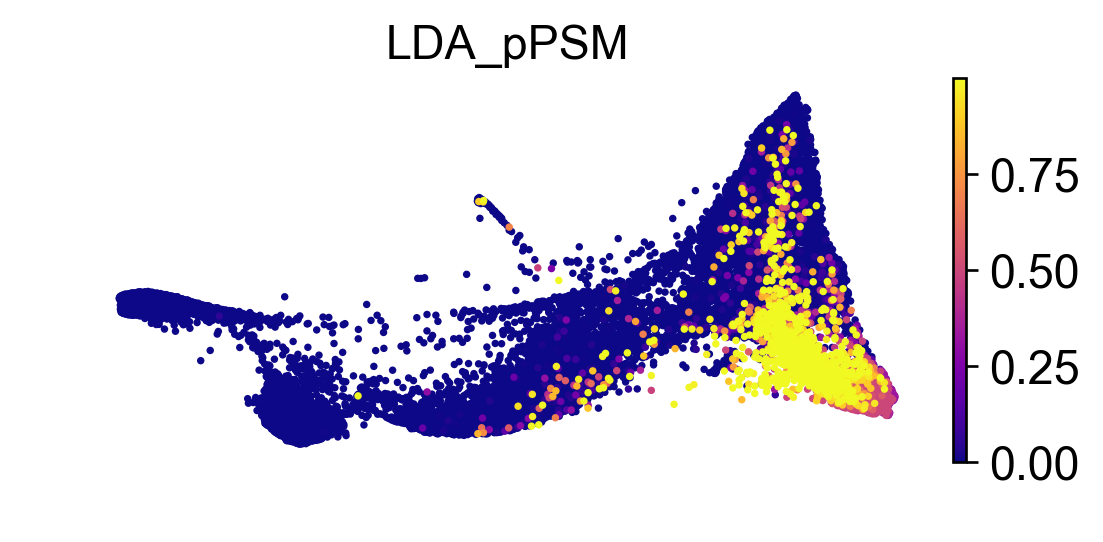

In [24]:
# Overlay classifier probabilities
cls = ['pPSM']
alg = ['NearestNeighbors', 'NeuralNet', 'RandomForest', 'LDA']

for cl in cls:
    for al in alg:
        mmES.obs['_']=mmES.obsm['proba_'+al][:,np.where(E95Classifier['Classes']==cl)[0][0]]
        sc.pl.draw_graph(mmES, color='_', edges=False, frameon=False, legend_loc='None',
                         legend_fontsize=10, size=20, legend_fontweight='bold', cmap='plasma', 
                         show=False, title=al+'_'+cl)
        dew.format_axes(eq_aspect=[0])
        plt.subplots_adjust(bottom=0, left=0, right=2, top=0.4) 
        #ax = plt.gcf().axes; ax[1].set_ylim([0,1])
        plt.savefig('figures/classifier_proba/draw_graph_fa_mmES_proba_'+al+'_'+cl+'.png', dpi=600, bbox_inches='tight')

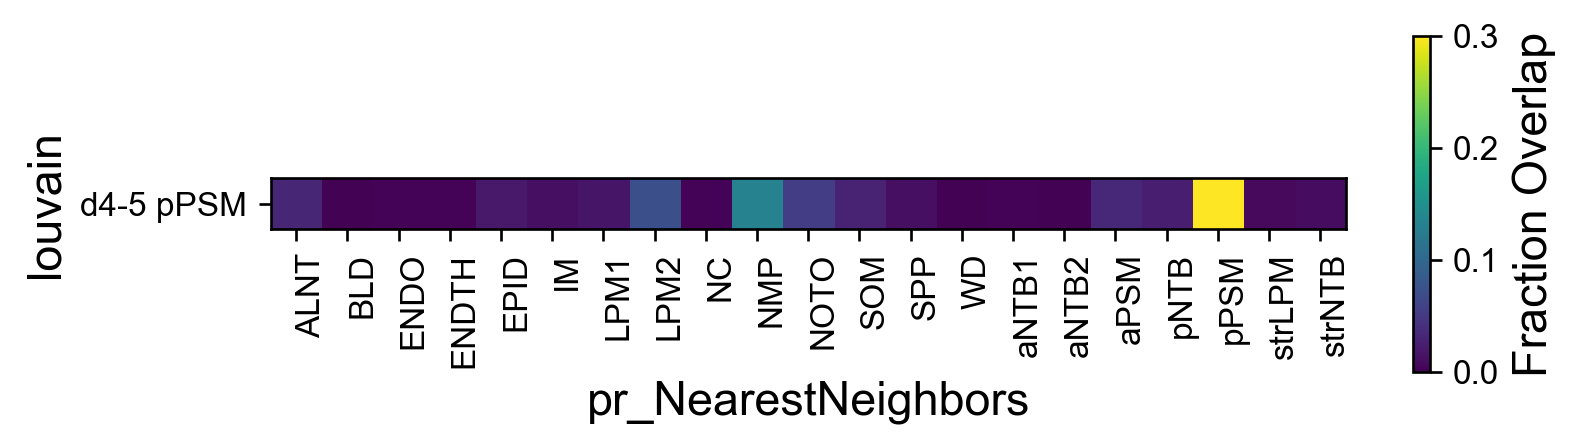

In [25]:
# Compare classification results 
mmES_pPSM = mmES[mmES.obs['louvain'].isin(['d4-5 pPSM']),:]
alg = ['NearestNeighbors']

for al in alg:
    dew.plot_confusion_matrix(mmES_pPSM.obs['pr_'+al],mmES_pPSM.obs['louvain'], title=' ', 
                              normalize=True, cmap='viridis', vmin=0, vmax=0.3)
    plt.subplots_adjust(bottom=0, left=0, right=1.4, top=0.7)
    plt.savefig('figures/classifier_conf/Louvain_v_pr'+al+'.png', dpi=600, bbox_inches='tight')

### Compute Pseudotime

In [27]:
# Generate a graph abstraction flag for PSM trajectory cells
PSMTF = mmES.obs['louvain'].isin(['d0 ESC', 'd2 Epi', 'd3 NMP', 'd4-5 pPSM'])
mmES.obs['PAGAFlag']='notPSM'
mmES.obs['PAGAFlag'][PSMTF]='PSM'
sc.tl.paga(mmES, groups='PAGAFlag')

/Users/dan/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
... storing 'PAGAFlag' as categorical


running PAGA
    finished (0:00:01.46) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


In [28]:
# Calculate dpt pseudotime, starting from the d0 cluster
mmES.uns['iroot'] = np.flatnonzero(mmES.obs['louvain']  == 'd0 ESC')[0]
sc.tl.diffmap(mmES)
sc.tl.dpt(mmES)

computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.0001466  0.99818873 0.9957241  0.99288124 0.99190557 0.9917324
     0.98694015 0.9829792  0.98240423 0.9755168  0.9736975  0.97214574
     0.97031677 0.9675019  0.96669793]
    finished (0:00:00.72) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.00) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


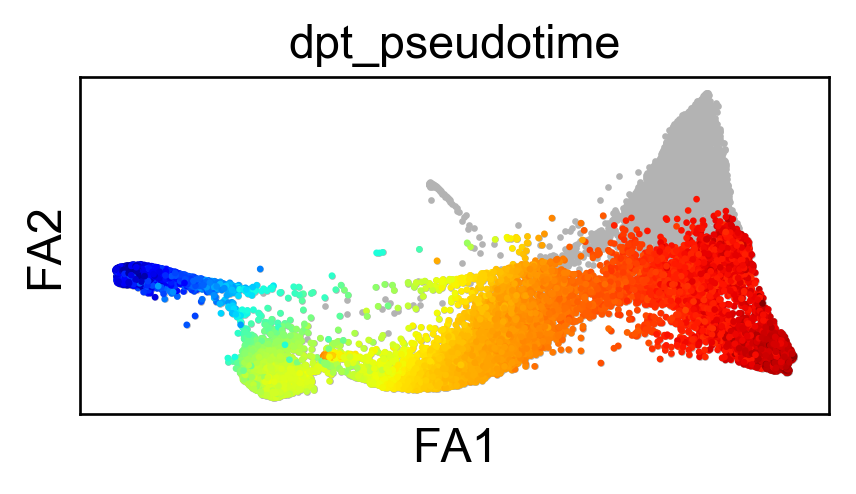

In [29]:
# Plot dpt values just for the PSM path
fig,ax =plt.subplots(figsize=(4,4))
ax.scatter(mmES.obsm['X_draw_graph_fa'][:,0], mmES.obsm['X_draw_graph_fa'][:,1], 
           c=[.7,.7,.7], s=1)
ax.scatter(mmES.obsm['X_draw_graph_fa'][:,0][PSMTF], mmES.obsm['X_draw_graph_fa'][:,1][PSMTF], 
           c=mmES.obs['dpt_pseudotime'][PSMTF], cmap='jet', s=1)
ax.set_xticks([]); ax.set_yticks([]);
ax.set_xlabel('FA1'); ax.set_ylabel('FA2'); ax.set_title('dpt_pseudotime')
dew.format_axes() 
fig.savefig('./figures/draw_graph_fa_mmES_sub_dpt.png', bbox_inches='tight')

### Plot Gene Expression Trajectories

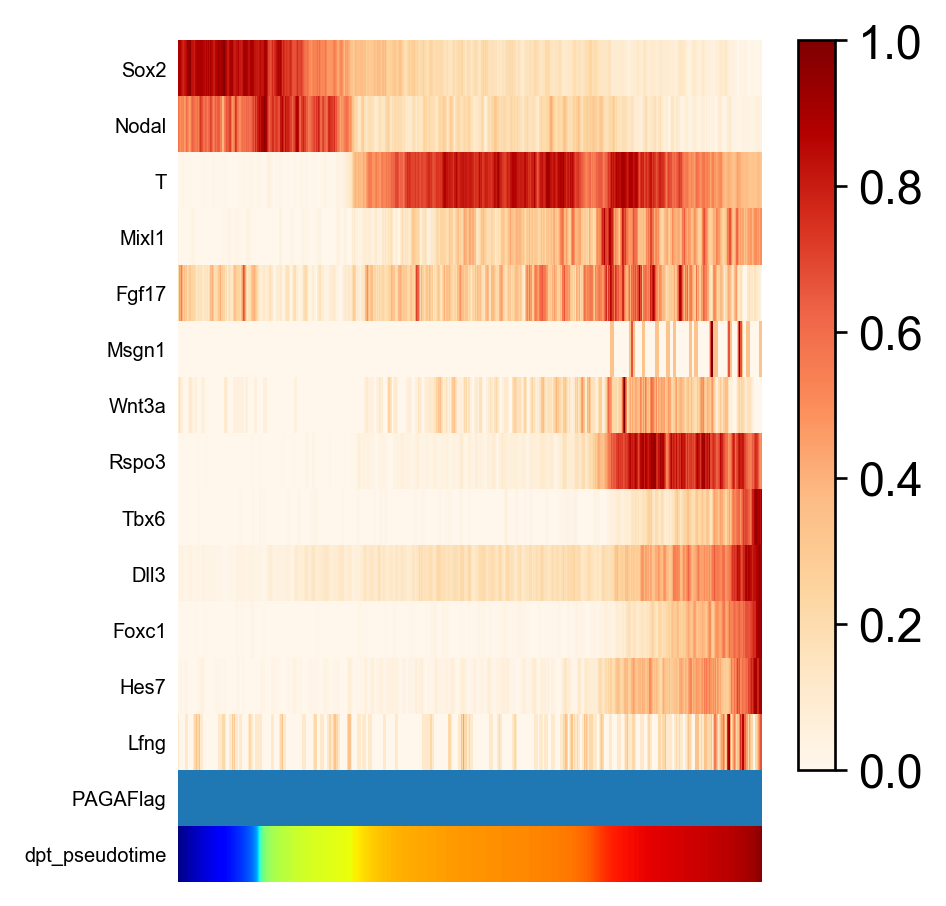

In [30]:
# Plot gene expression trajectories for select markers
traj_genes = traj_genes = ['Sox2','Nodal','T','Mixl1','Fgf17','Msgn1','Wnt3a','Rspo3','Tbx6','Dll3','Foxc1','Hes7','Lfng']
ax = sc.pl.paga_path(mmES, nodes=['PSM'], keys=traj_genes, use_raw=True, annotations=['dpt_pseudotime'],
                     color_map='OrRd', color_maps_annotations={'dpt_pseudotime': 'jet'}, palette_groups=None, 
                     n_avg=100, groups_key='PAGAFlag', xlim=[None, None], title=None, left_margin=None, ytick_fontsize=6, 
                     title_fontsize=None, show_node_names=False, show_yticks=True, show_colorbar=True, 
                     legend_fontsize=1, legend_fontweight=None, normalize_to_zero_one=True, as_heatmap=True, 
                     return_data=True, show=False, ax=None)
plt.savefig('figures/paga_path_markers.png', dpi=2000, bbox_inches='tight')


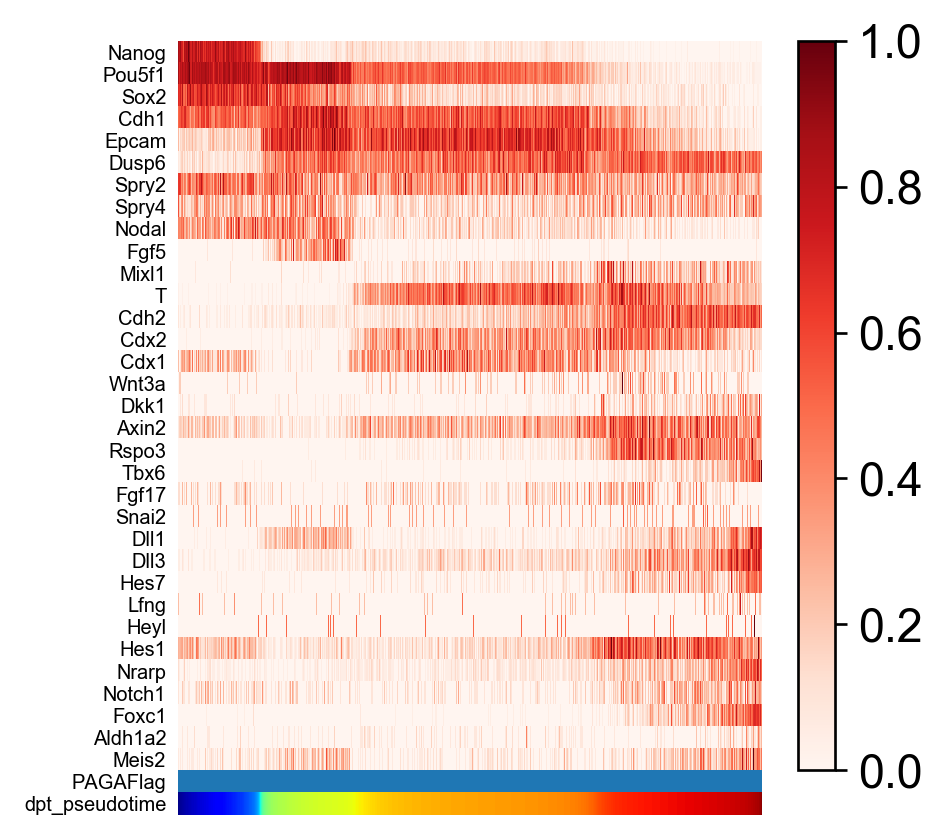

In [31]:
# Plot gene expression trajectories for select markers (supplement)
mouse_markers=['Nanog','Pou5f1','Sox2','Cdh1','Epcam','Dusp6','Spry2','Spry4','Nodal','Fgf5','Mixl1','T','Cdh2','Cdx2','Cdx1','Wnt3a','Dkk1','Axin2','Rspo3','Tbx6','Fgf17','Snai2','Dll1','Dll3','Hes7','Lfng','Heyl','Hes1','Nrarp','Notch1','Foxc1','Aldh1a2','Meis2']
ax = sc.pl.paga_path(mmES, nodes=['PSM'], keys=mouse_markers, use_raw=True, annotations=['dpt_pseudotime'],
                     color_map='Reds', color_maps_annotations={'dpt_pseudotime': 'jet'}, palette_groups=None, 
                     n_avg=10, groups_key='PAGAFlag', xlim=[None, None], title=None, left_margin=None, ytick_fontsize=6, 
                     title_fontsize=None, show_node_names=False, show_yticks=True, show_colorbar=True, 
                     legend_fontsize=1, legend_fontweight=None, normalize_to_zero_one=True, as_heatmap=True, 
                     return_data=False, show=False, ax=None)
plt.savefig('figures/paga_path_markers_supp.png', dpi=2000, bbox_inches='tight')


### ________________________
  
  

### Save AnnData DataSet to File

In [32]:
mmES.obs.to_csv('Diaz2019_mmES_analyzed_obs.csv')
mmES.write('Diaz2019_mmES_analyzed.h5ad')

### Load AnnData DataSet from File

In [ ]:
mmES = sc.read('Diaz2019_mmES_analyzed.h5ad')
print(mmES)

### ________________________
  
  

### Generate SPRING Plots

In [ ]:
# Scale & invert the y-axis for compatibility with SPRING
mmES.obsm['X_forSPRING']=mmES.obsm['X_draw_graph_fa']
mmES.obsm['X_forSPRING'][:,1]=-0.5*mmES.obsm['X_forSPRING'][:,1]

sc.external.exporting.spring_project(mmES, 'mmES_SPRING', 'X_forSPRING', subplot_name='full', 
                                cell_groupings=['louvain','library_id','time_id'], custom_color_tracks=['n_counts','n_genes','dpt_pseudotime'], 
                                total_counts_key='n_counts', overwrite=True)
